# House Price Project

## 1 Exploratory Data Analysis

### 1.1 Imports

In [567]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# import pickle
import pickle

# import zscore
from scipy.stats import zscore

### 1.2 Data Overview

In [568]:
# Reading the dataset
df = pd.read_csv('data/train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [569]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [570]:
# identify the data types
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

## 2 Missing Data

### 2.1 Finding Missing Values

In [571]:
# display the columns with missing values
df.isna().sum()[df.isna().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [572]:
# remove the columns with missing values above 45%
df = df.dropna(thresh=0.55*len(df), axis=1)

In [573]:
# display the catergorical columns with missing values
df.select_dtypes('object').isna().sum()[df.select_dtypes('object').isna().sum() > 0]

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [574]:
# Handle the missing values in categorical columns
for col in df.select_dtypes('object'):
    # Option 1: Fill with a new 'Unknown' category
    df[col] = df[col].fillna('mode')

In [575]:
# display the columns with missing values
df.isna().sum()[df.isna().sum() > 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [576]:
# impute the missing in the numerical columns with the mean
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [577]:
# display the columns with missing values
df.isna().sum()[df.isna().sum() > 0]

Series([], dtype: int64)

## 3 Handling Outliers

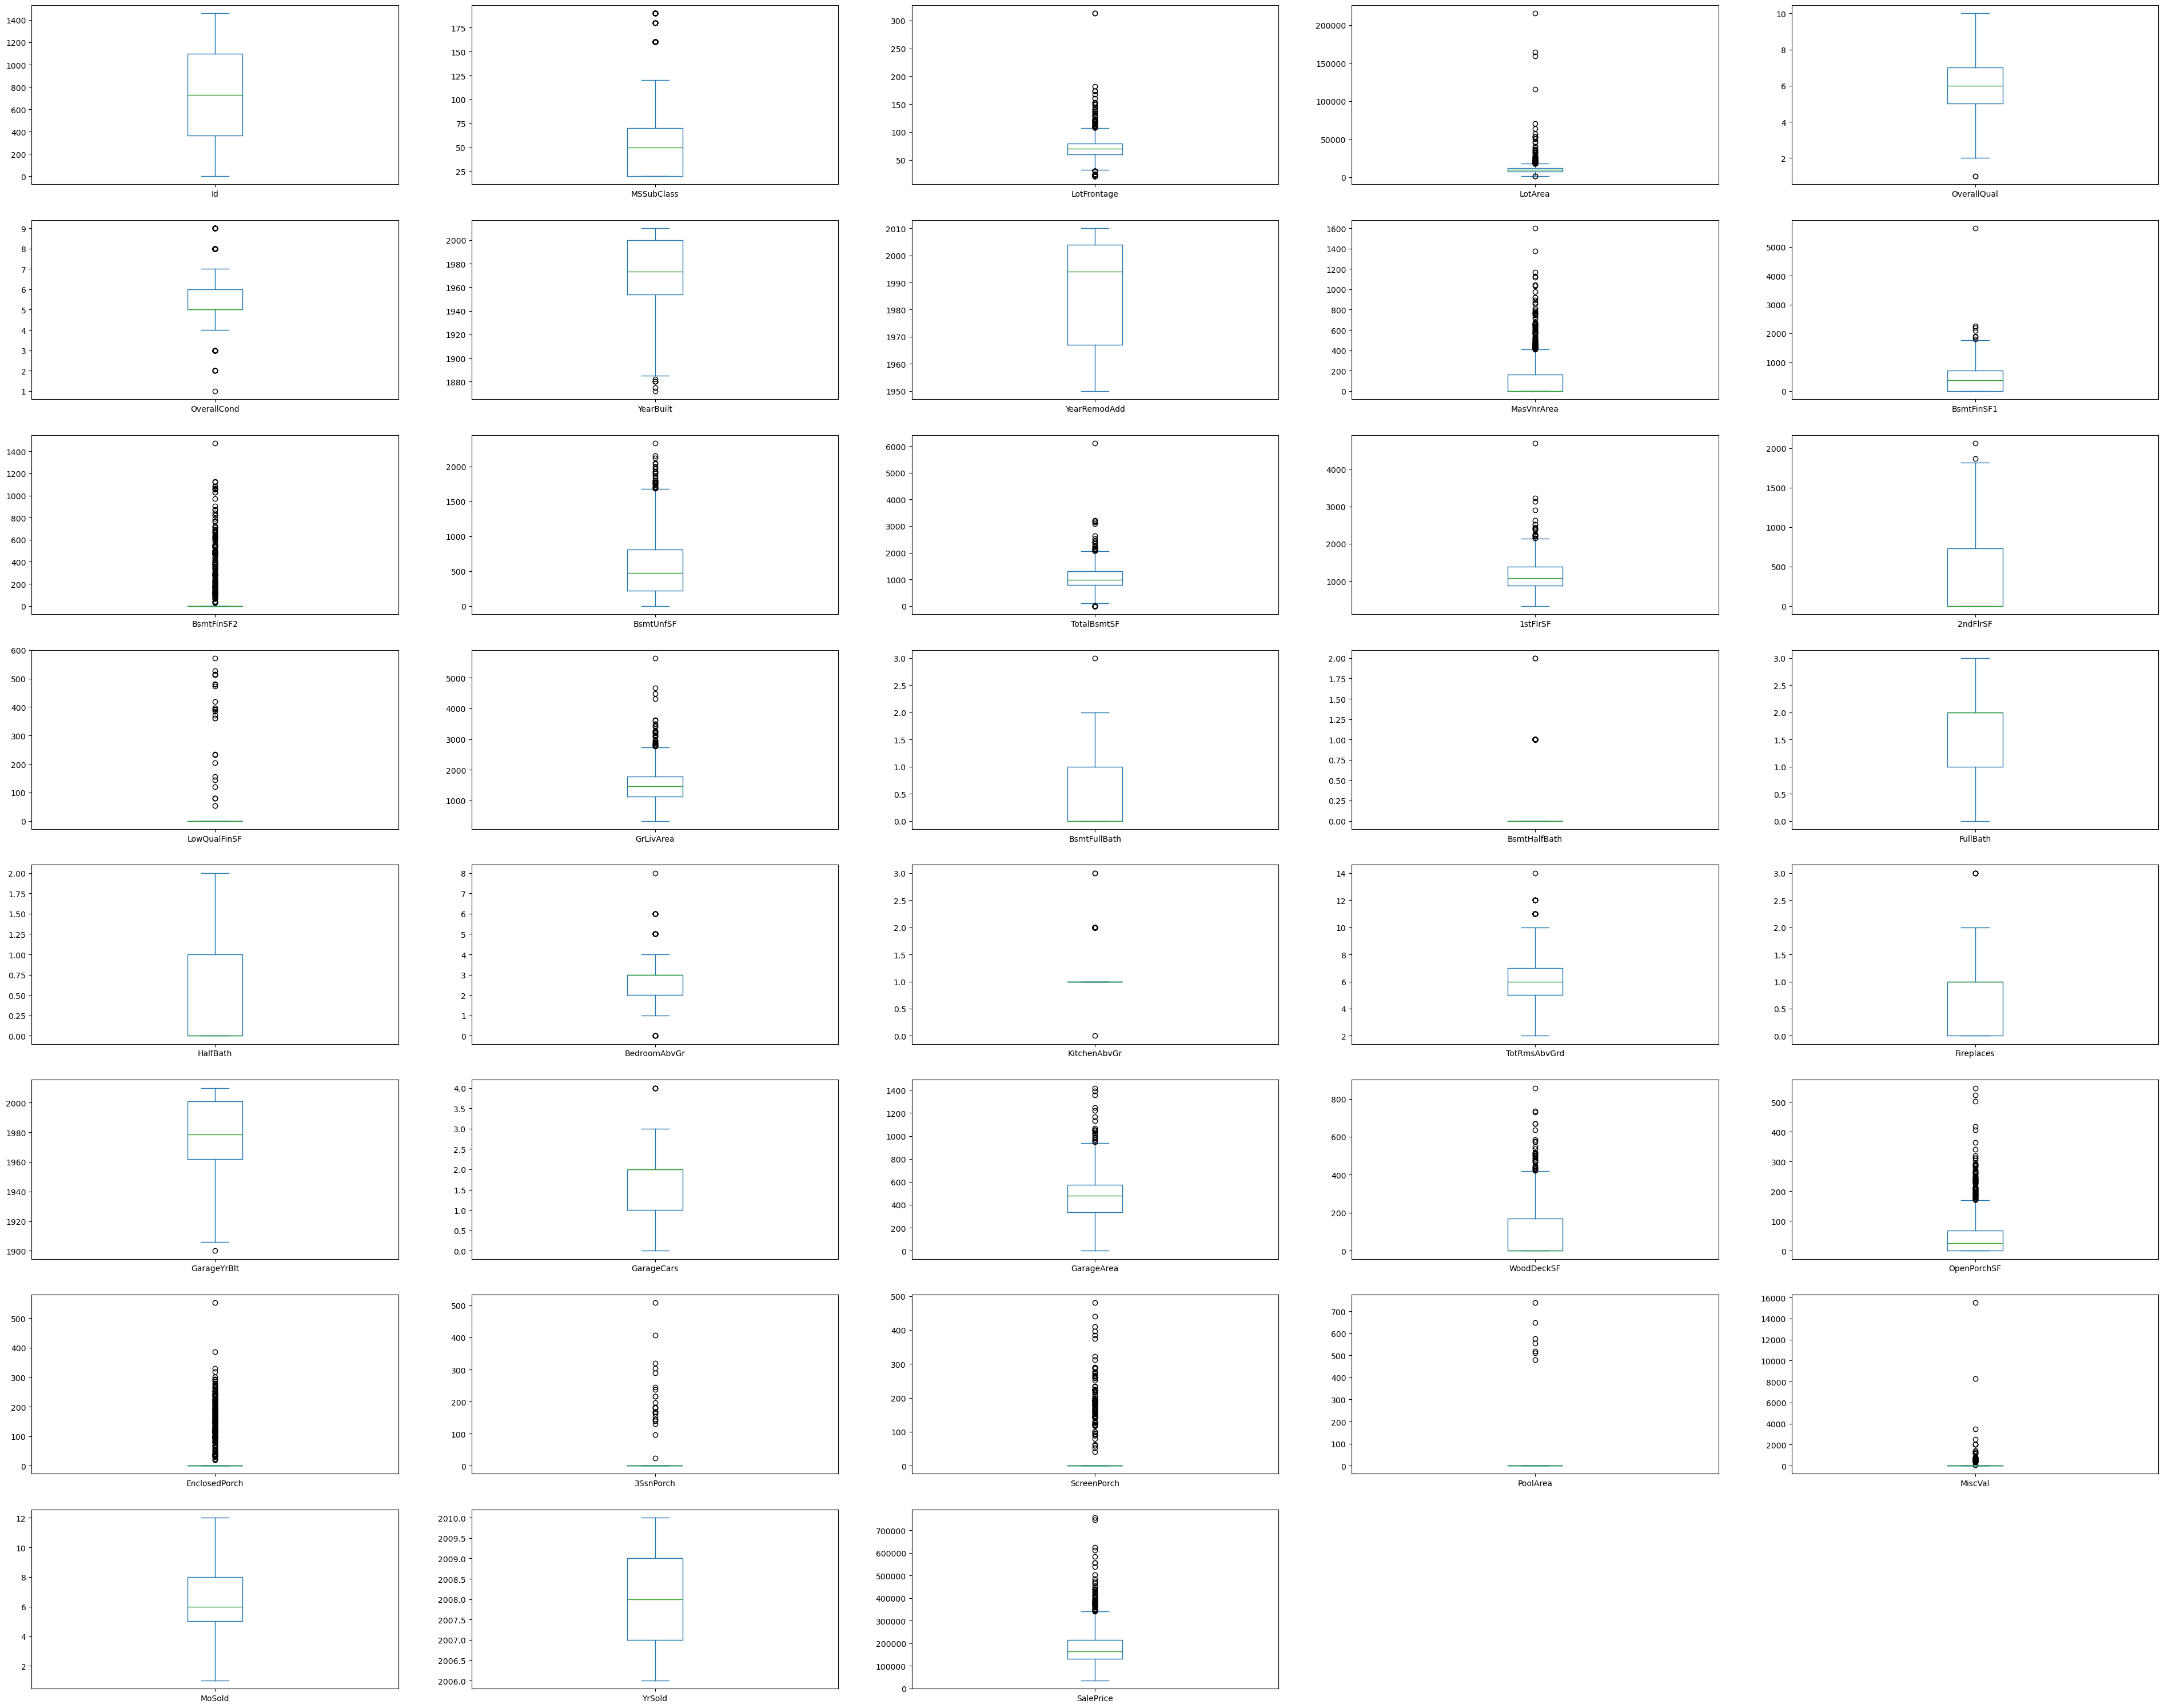

In [578]:
# box plot
df.plot(kind='box', subplots=True, layout=(10,5), sharex=False, sharey=False, figsize=(48,48))
plt.show()

### 3.1 LotFrontage

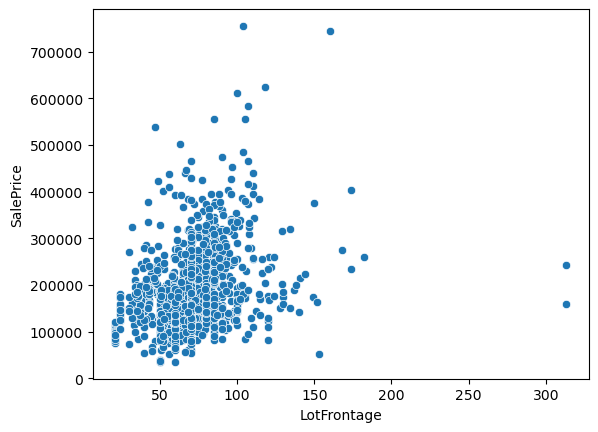

In [579]:
# draw a scatter plot for LotFrontage and SalePrice
sns.scatterplot(x='LotFrontage', y='SalePrice', data=df)
plt.show()

In [580]:
df.query('LotFrontage > 300')

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
934    935          20       RL        313.0    27650   Pave      IR2   
1298  1299          60       RL        313.0    63887   Pave      IR3   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
934          HLS    AllPub    Inside       Mod        NAmes       PosA   
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
934        Norm     1Fam     1Story            7            7       1960   
1298       Norm     1Fam     2Story           10            5       2008   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrArea  \
934           2007      Flat  Tar&Grv     Wd Sdng     Wd Sdng         0.0   
1298          2008       Hip  ClyTile      Stucco      Stucco       796.0   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
934         TA        TA     CBlock       Gd       TA           Gd   
1298        Ex        TA      PConc       Ex       TA           Gd   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
934           GLQ         425          Unf           0        160   
1298          GLQ        5644          Unf           0        466   

      TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
934           585    GasA        Ex          Y      SBrkr      2069         0   
1298         6110    GasA        Ex          Y      SBrkr      4692       950   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
934              0       2069             1             0         2         0   
1298             0       5642             2             0         2         1   

      BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
934              4             1          Gd             9        Typ   
1298             3             1          Ex            12        Typ   

      Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
934            1     Attchd       1960.0          RFn           2         505   
1298           3     Attchd       2008.0          Fin           2        1418   

     GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
934          TA         TA          Y           0            0              0   
1298         TA         TA          Y         214          292              0   

      3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType  \
934           0            0         0        0      11    2008       WD   
1298          0            0       480        0       1    2008      New   

     SaleCondition  SalePrice  
934         Normal     242000  
1298       Partial     160000

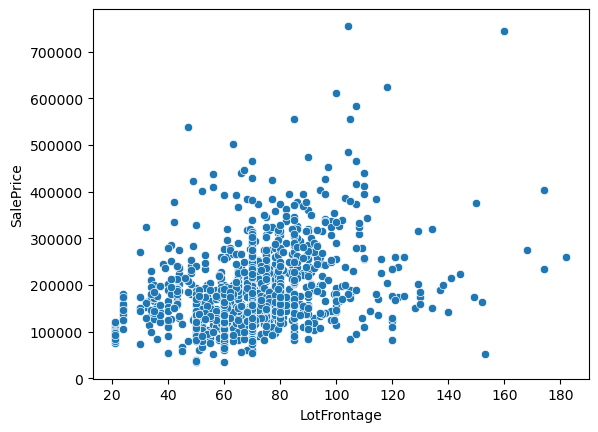

In [581]:
# drop the row with LotFrontage value over 300
df.drop(df[df['LotFrontage'] > 300].index, inplace = True)

sns.scatterplot(x='LotFrontage', y='SalePrice', data=df)
plt.show()

### 3.2 LotArea

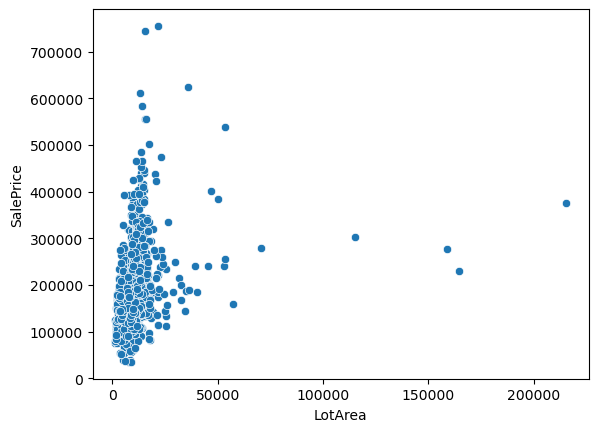

In [582]:
# scatter plot of LotArea and SalePrice
sns.scatterplot(x='LotArea', y='SalePrice', data=df)
plt.show()

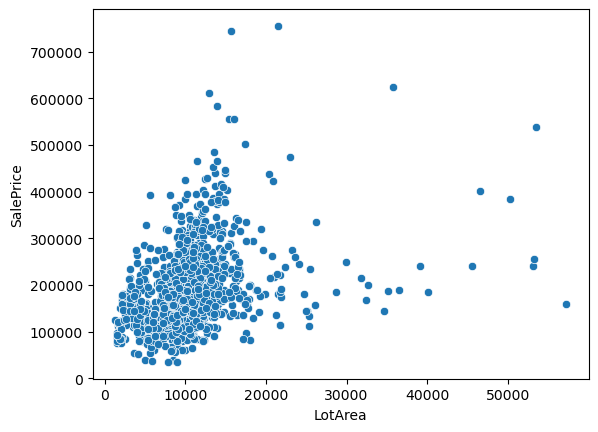

In [583]:
# drop the row with LotArea value over 70000
df.drop(df[df['LotArea'] > 70000].index, inplace = True)

sns.scatterplot(x='LotArea', y='SalePrice', data=df)
plt.show()

### 3.3 Utilities

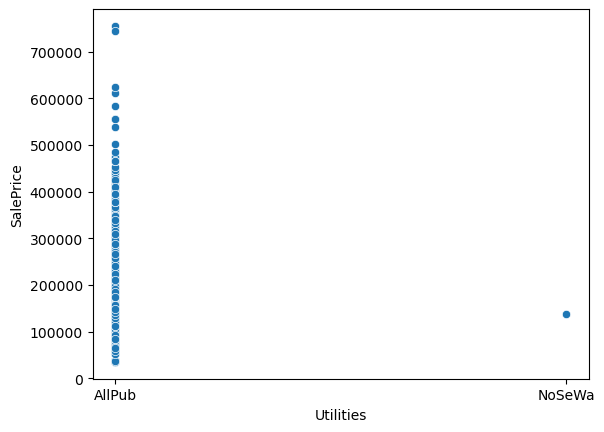

In [584]:
# draw a scatter plot of Utilities and SalePrice
sns.scatterplot(x='Utilities', y='SalePrice', data=df)
plt.show()

In [585]:
# state the query of utilities column
df.query('Utilities == "NoSeWa"')

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
944  945          20       RL    70.049958    14375   Pave      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
944         Lvl    NoSeWa   CulDSac       Gtl       Timber       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
944       Norm     1Fam       SLvl            6            6       1958   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrArea  \
944          1958     Gable  CompShg     HdBoard     HdBoard       541.0   

    ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
944        TA        TA     CBlock       TA       TA           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
944          GLQ         111          Rec         354        354          819   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
944    GasA        Gd          Y      FuseA      1344         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
944       1344             0             1         1         0             3   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
944             1          Gd             7        Typ           1    Basment   

     GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond  \
944       1958.0          RFn           2         525         TA         TA   

    PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
944          Y           0          118              0          0   

     ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition  \
944          233         0        0       1    2009      COD       Abnorml   

     SalePrice  
944     137500

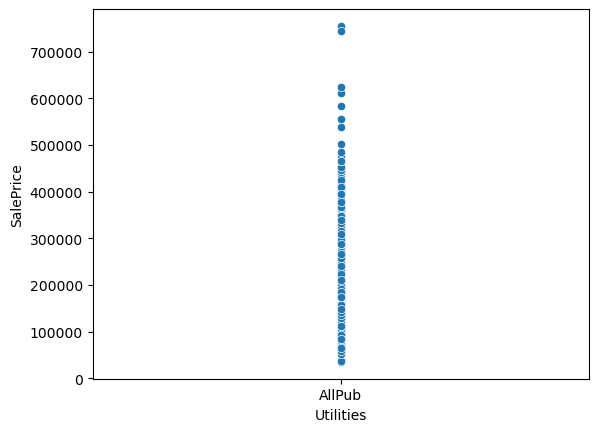

In [586]:
# drop the row with Utilities value NoSeWa
df.drop(df[df['Utilities'] == 'NoSeWa'].index, inplace = True)

sns.scatterplot(x='Utilities', y='SalePrice', data=df)
plt.show()

### 3.5 Neighborhood

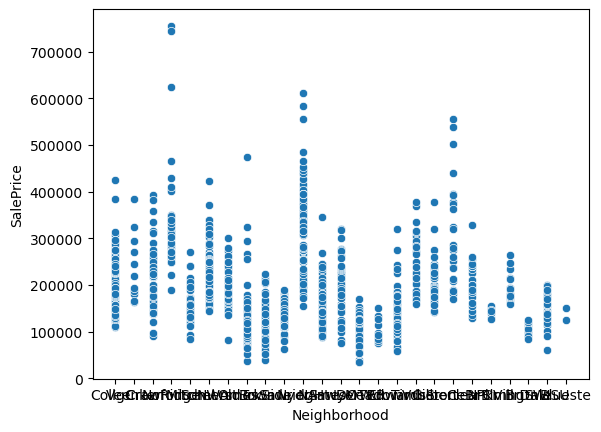

In [587]:
# draw a scatter plot of Neighborhood and SalePrice so that we can see the relationship
sns.scatterplot(x='Neighborhood', y='SalePrice', data=df)
plt.show()

In [588]:
# show the values and features in Neighborhood
df['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [589]:
# count the datapoint in Neighborhood
df['Neighborhood'].value_counts()

Neighborhood
NAmes      224
CollgCr    150
OldTown    113
Edwards     99
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
IDOTRR      37
Timber      35
StoneBr     25
ClearCr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [590]:
# drop the row in Neighborhood called Blueste
df.drop(df[df['Neighborhood'] == 'Blueste'].index, inplace = True)

In [591]:
# count the datapoint in Neighborhood
df['Neighborhood'].value_counts()

Neighborhood
NAmes      224
CollgCr    150
OldTown    113
Edwards     99
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
IDOTRR      37
Timber      35
StoneBr     25
ClearCr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Name: count, dtype: int64

### 3.6 Condition 1

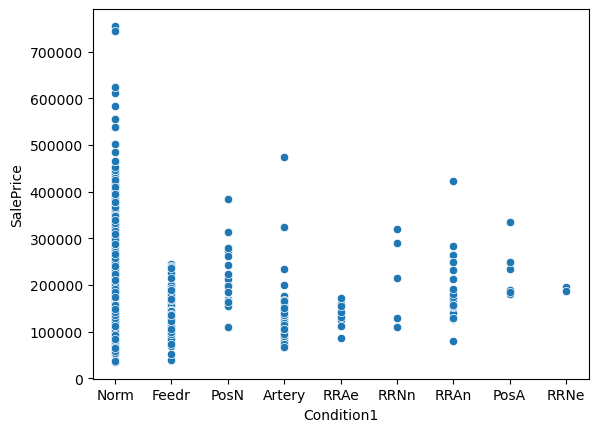

In [592]:
# draw a scatter plot of Condition1 and SalePrice
sns.scatterplot(x='Condition1', y='SalePrice', data=df)
plt.show()

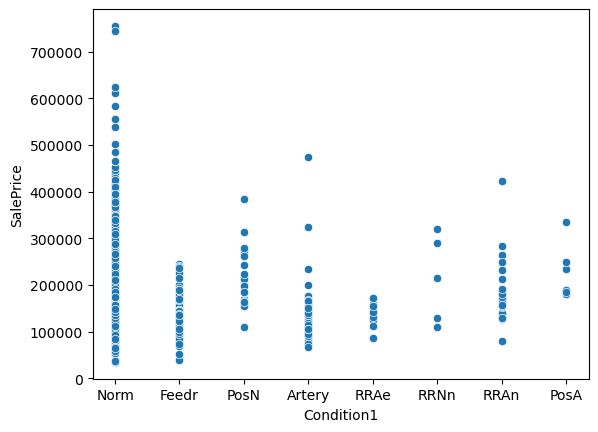

In [593]:
# drop the row in Condtional1 called RRNe and RRNn
df.drop(df[df['Condition1'] == 'RRNe'].index, inplace = True)

sns.scatterplot(x='Condition1', y='SalePrice', data=df)
plt.show()

### 3.7 Condition2

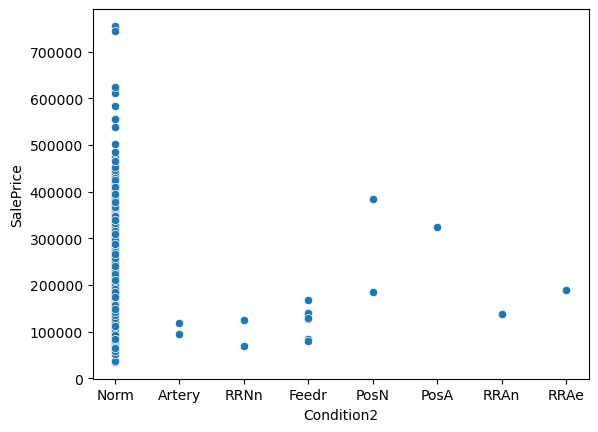

In [594]:
# draw a scatter plot of Condition2 and SalePrice
sns.scatterplot(x='Condition2', y='SalePrice', data=df)
plt.show()

In [595]:
# drop the row in Condtional2 called PosA, RRAn and RRAe
df.drop(df[df['Condition2'] == 'PosA'].index, inplace = True)
df.drop(df[df['Condition2'] == 'RRAn'].index, inplace = True)
df.drop(df[df['Condition2'] == 'RRAe'].index, inplace = True)
df.drop(df[df['Condition2'] == 'Artery'].index, inplace = True)
df.drop(df[df['Condition2'] == 'RRNn'].index, inplace = True)
df.drop(df[df['Condition2'] == 'PosN'].index, inplace = True)

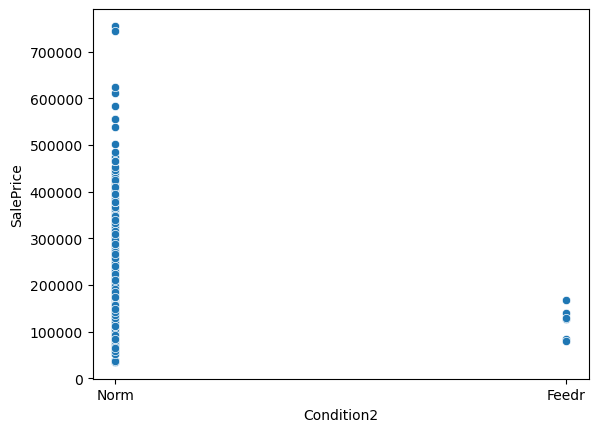

In [596]:
# draw a scatter plot of Condition2 and SalePrice
sns.scatterplot(x='Condition2', y='SalePrice', data=df)
plt.show()

### 3.8 OverallQual

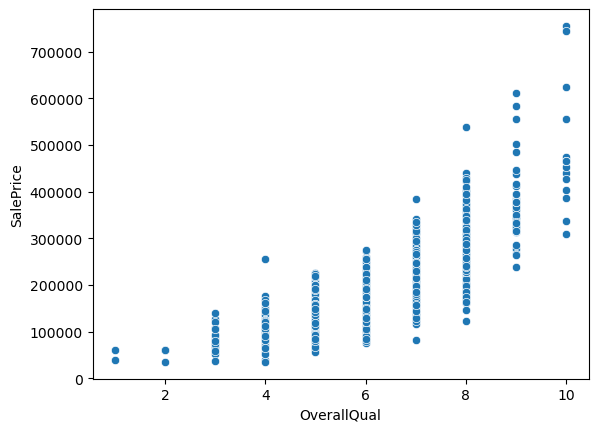

In [597]:
# draw a scatter plot of OverallQual and SalePrice
sns.scatterplot(x='OverallQual', y='SalePrice', data=df)
plt.show()

In [598]:
# drop the row with OverallQual value 1 and 2
df.drop(df[df['OverallQual'] == 1].index, inplace = True)
df.drop(df[df['OverallQual'] == 2].index, inplace = True)

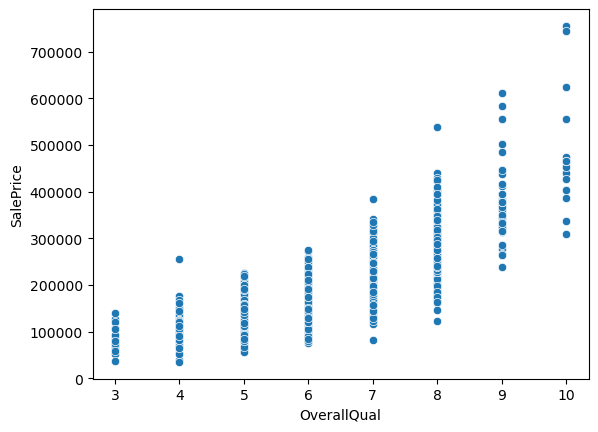

In [599]:
# draw a scatter plot of OverallQual and SalePrice
sns.scatterplot(x='OverallQual', y='SalePrice', data=df)
plt.show()

### 3.9 OverallCond

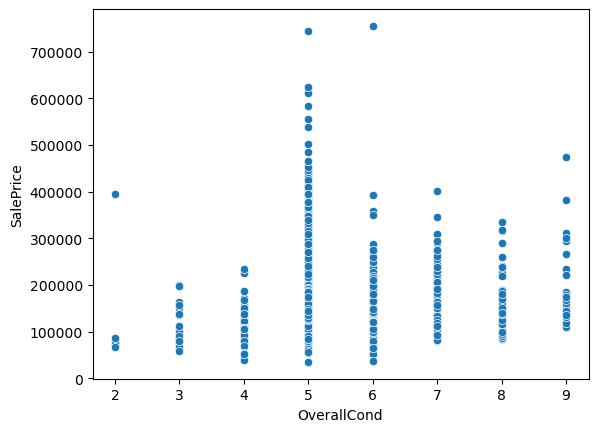

In [600]:
# draw a scatter plot of OverallCond and SalePrice
sns.scatterplot(x='OverallCond', y='SalePrice', data=df)
plt.show()

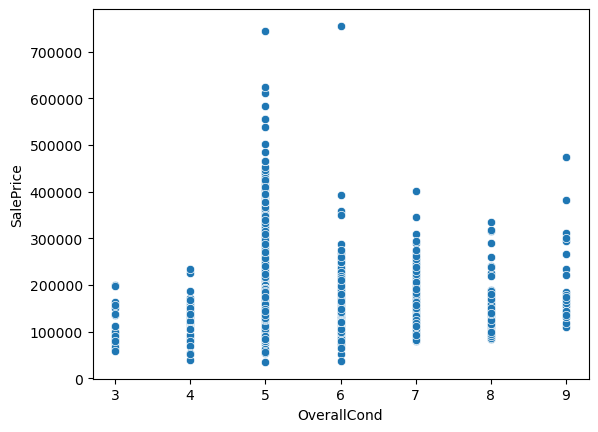

In [601]:
# drop the row with OverallCond value 2
df.drop(df[df['OverallCond'] == 2].index, inplace = True)

sns.scatterplot(x='OverallCond', y='SalePrice', data=df)
plt.show()

### 3.10 RoofStyle

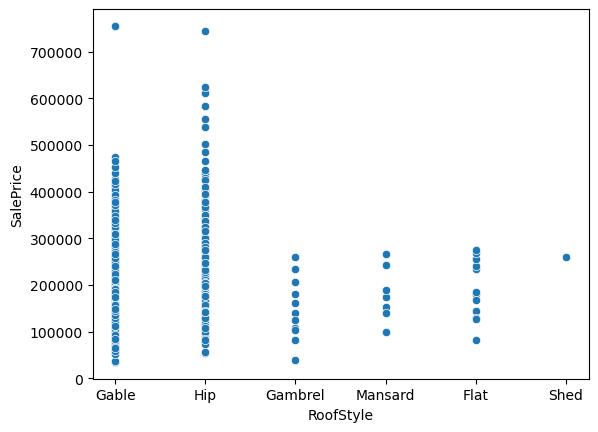

In [602]:
# scatter plot of RoofStyle and SalePrice
sns.scatterplot(x='RoofStyle', y='SalePrice', data=df)
plt.show()

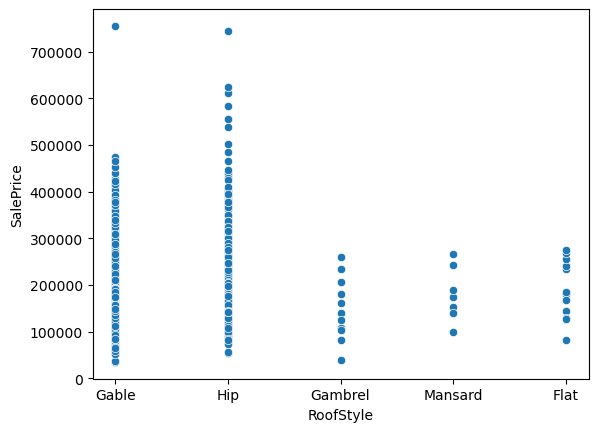

In [603]:
# drop the row with RoofStyle called Shed
df.drop(df[df['RoofStyle'] == 'Shed'].index, inplace = True)

# scatter plot of RoofStyle and SalePrice
sns.scatterplot(x='RoofStyle', y='SalePrice', data=df)
plt.show()

### 3.11 RoofMat1

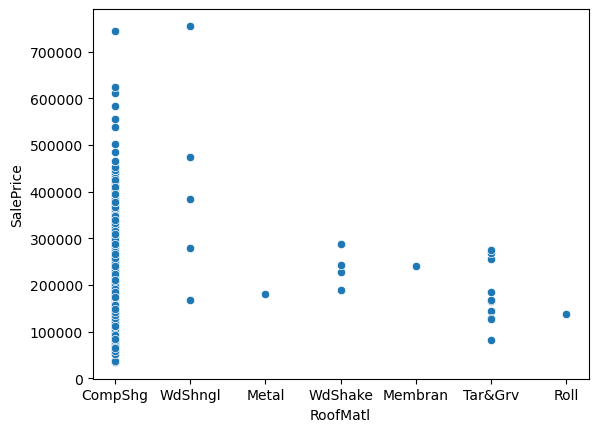

In [604]:
# scatter plot of RoofMatl and SalePrice
sns.scatterplot(x='RoofMatl', y='SalePrice', data=df)
plt.show()

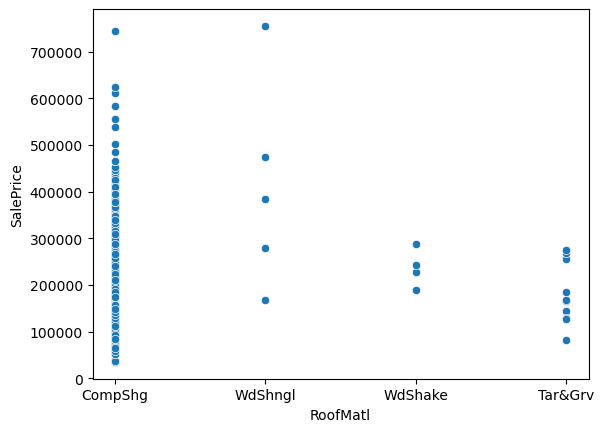

In [605]:
# drop the row with RoofMatl called Metal, Roll and Membran
df.drop(df[df['RoofMatl'] == 'Metal'].index, inplace = True)
df.drop(df[df['RoofMatl'] == 'Roll'].index, inplace = True)
df.drop(df[df['RoofMatl'] == 'Membran'].index, inplace = True)

# scatter plot of RoofMatl and SalePrice
sns.scatterplot(x='RoofMatl', y='SalePrice', data=df)
plt.show()

### 3.12 Exterior1st

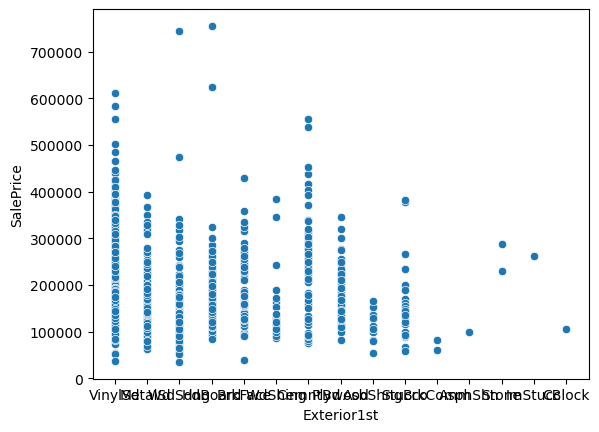

In [606]:
# scatter plot of Exterior1st and SalePrice
sns.scatterplot(x='Exterior1st', y='SalePrice', data=df)
plt.show()

In [607]:
# count the datapoints in Exterior1st
df['Exterior1st'].value_counts()


Exterior1st
VinylSd    512
HdBoard    218
MetalSd    214
Wd Sdng    200
Plywood    100
CemntBd     59
BrkFace     49
WdShing     26
Stucco      24
AsbShng     16
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64

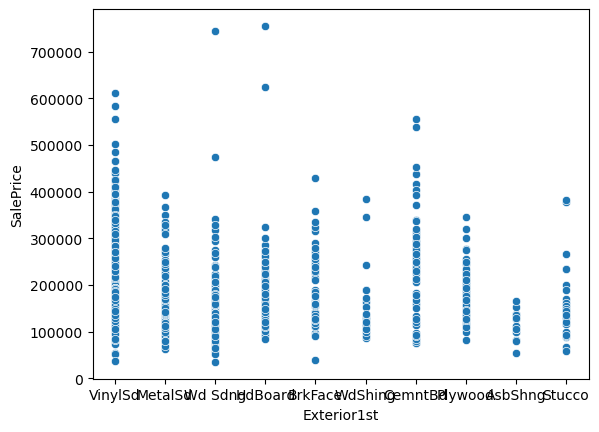

In [608]:
# drop the row with Exterior1st called BrkComm, Stone, AsphShn, ImStucc and CBlock
df.drop(df[df['Exterior1st'] == 'BrkComm'].index, inplace = True)
df.drop(df[df['Exterior1st'] == 'Stone'].index, inplace = True)
df.drop(df[df['Exterior1st'] == 'AsphShn'].index, inplace = True)
df.drop(df[df['Exterior1st'] == 'ImStucc'].index, inplace = True)
df.drop(df[df['Exterior1st'] == 'CBlock'].index, inplace = True)

# scatter plot of Exterior1st and SalePrice
sns.scatterplot(x='Exterior1st', y='SalePrice', data=df)
plt.show()

### 3.13 Exterior2nd

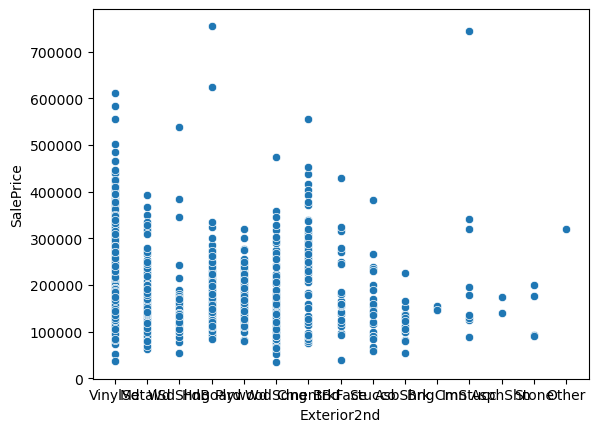

In [609]:
# scatter plot of Exterior2nd and SalePrice
sns.scatterplot(x='Exterior2nd', y='SalePrice', data=df)
plt.show()

In [610]:
# count the datapoints in Exterior2nd
df['Exterior2nd'].value_counts()

Exterior2nd
VinylSd    501
MetalSd    208
HdBoard    201
Wd Sdng    193
Plywood    133
CmentBd     58
Wd Shng     38
BrkFace     24
Stucco      24
AsbShng     17
ImStucc      9
Brk Cmn      5
Stone        4
AsphShn      2
Other        1
Name: count, dtype: int64

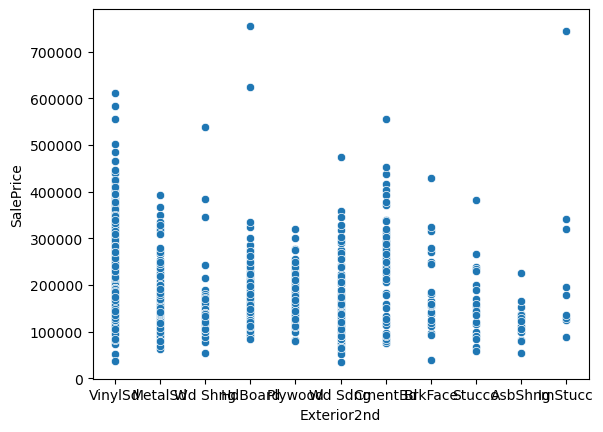

In [611]:
# drop the row with Exterior2nd called Brk Cmn, Stone, AsphShn and Other
df.drop(df[df['Exterior2nd'] == 'Brk Cmn'].index, inplace = True)
df.drop(df[df['Exterior2nd'] == 'Stone'].index, inplace = True)
df.drop(df[df['Exterior2nd'] == 'AsphShn'].index, inplace = True)
df.drop(df[df['Exterior2nd'] == 'Other'].index, inplace = True)

# scatter plot of Exterior2nd and SalePrice
sns.scatterplot(x='Exterior2nd', y='SalePrice', data=df)
plt.show()

### 3.14 MasVnrArea

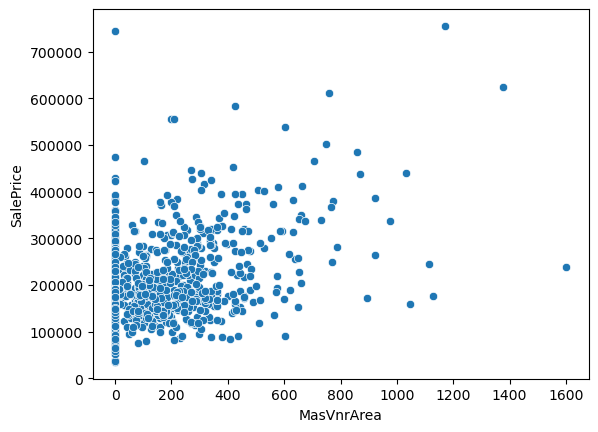

In [612]:
# draw a scatter plot of MasVnrArea and SalePrice
sns.scatterplot(x='MasVnrArea', y='SalePrice', data=df)
plt.show()

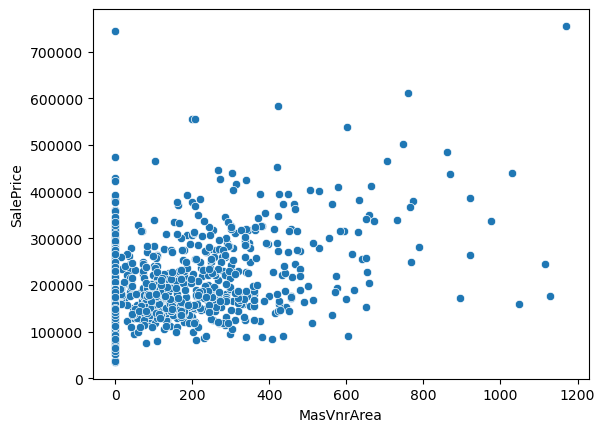

In [613]:
# drop the rows with MasVnrArea value over 1500
df.drop(df[df['MasVnrArea'] > 1200].index, inplace = True)

# draw a scatter plot of MasVnrArea and SalePrice
sns.scatterplot(x='MasVnrArea', y='SalePrice', data=df)
plt.show()

### 3.15 ExterCond

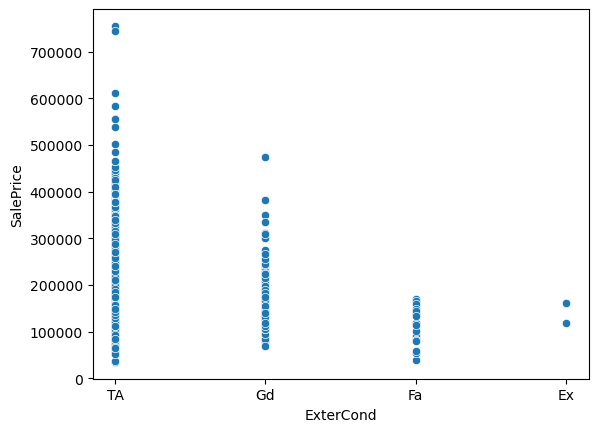

In [614]:
# draw a scatter plot of ExterCond and SalePrice
sns.scatterplot(x='ExterCond', y='SalePrice', data=df)
plt.show()

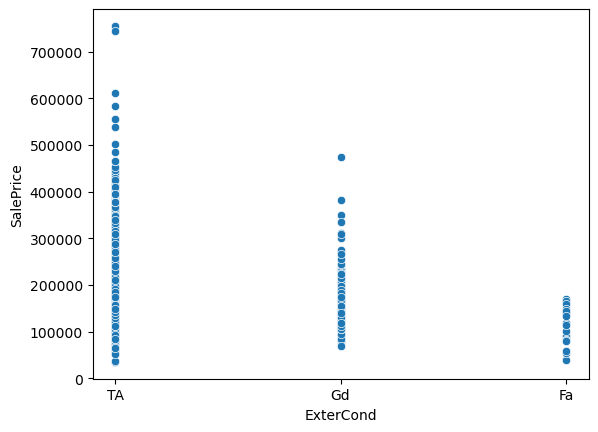

In [615]:
# drop the row with ExterCond called Ex
df.drop(df[df['ExterCond'] == 'Ex'].index, inplace = True)

# draw a scatter plot of ExterCond and SalePrice
sns.scatterplot(x='ExterCond', y='SalePrice', data=df)
plt.show()

### 3.16 Foundation

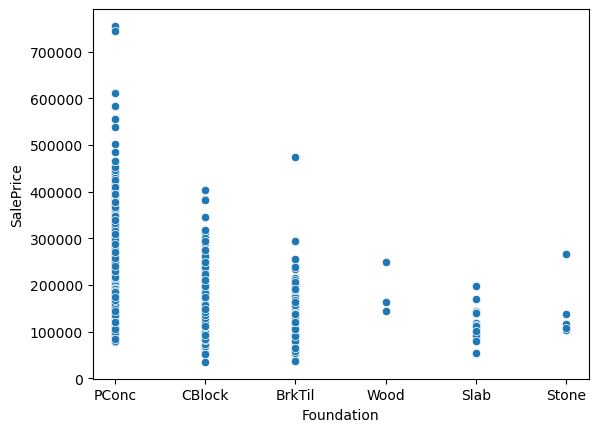

In [616]:
# draw a scatter plot of Foundation and SalePrice
sns.scatterplot(x='Foundation', y='SalePrice', data=df)
plt.show()

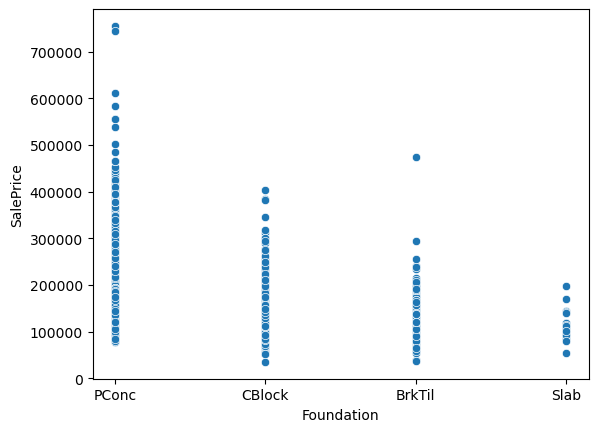

In [617]:
# drop the row with Foundation called Wood
df.drop(df[df['Foundation'] == 'Wood'].index, inplace = True)
df.drop(df[df['Foundation'] == 'Stone'].index, inplace = True)

# draw a scatter plot of Foundation and SalePrice
sns.scatterplot(x='Foundation', y='SalePrice', data=df)
plt.show()

### 3.18 BsmtFinSF2

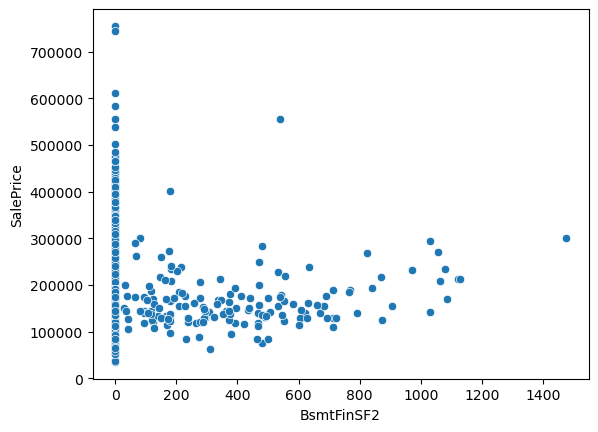

In [618]:
# scatter plot of BsmtFinSF2 and SalePrice
sns.scatterplot(x='BsmtFinSF2', y='SalePrice', data=df)
plt.show()

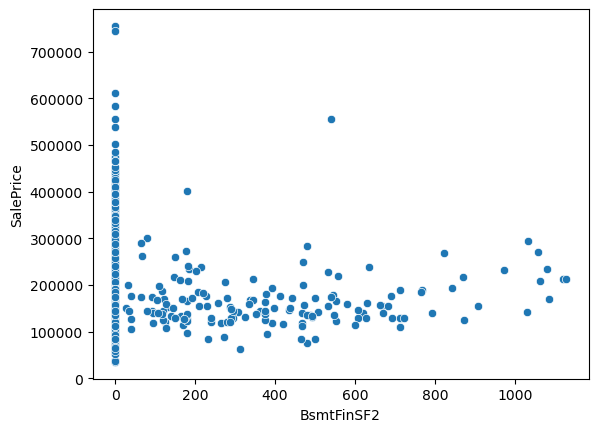

In [619]:
# drop the row with BsmtFinSF2 value over 1400
df.drop(df[df['BsmtFinSF2'] > 1400].index, inplace = True)

sns.scatterplot(x='BsmtFinSF2', y='SalePrice', data=df)
plt.show()

### 3.19 TotalBsmtSF

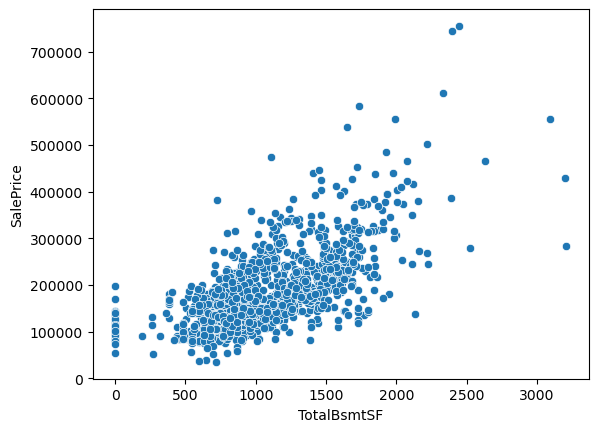

In [620]:
# scatter plot of TotalBsmtSF and SalePrice
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df)
plt.show()

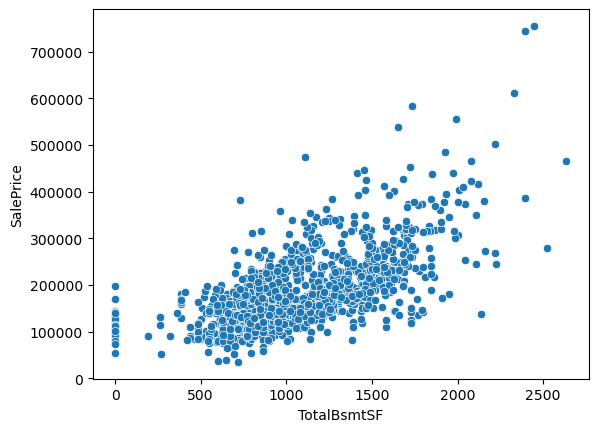

In [621]:
# drop the row with TotalBsmtSF value over 3000
df.drop(df[df['TotalBsmtSF'] > 3000].index, inplace = True)

sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df)
plt.show()

### 3.20 Heating

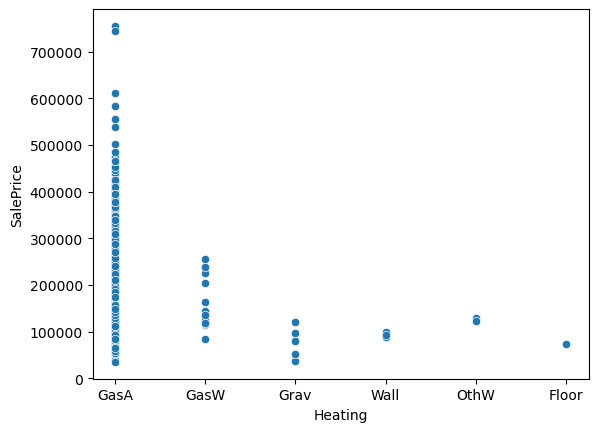

In [622]:
# scatter plot of Heat and SalePrice
sns.scatterplot(x='Heating', y='SalePrice', data=df)
plt.show()

In [623]:
# count the values of Heating
df['Heating'].value_counts()

Heating
GasA     1363
GasW       14
Grav        6
Wall        3
OthW        2
Floor       1
Name: count, dtype: int64

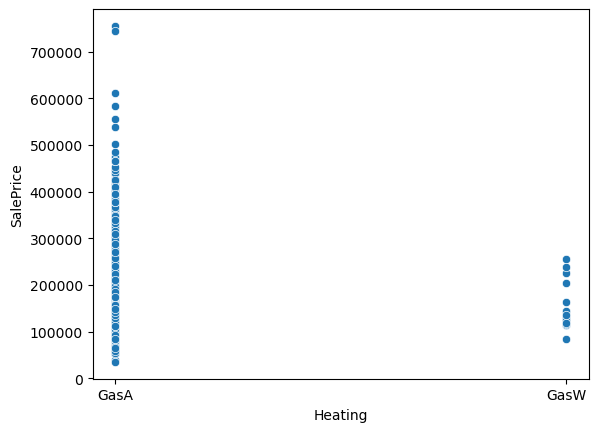

In [624]:
# drop the row with Heating called Floor, Wall and OthW
df.drop(df[df['Heating'] == 'Floor'].index, inplace = True)
df.drop(df[df['Heating'] == 'Wall'].index, inplace = True)
df.drop(df[df['Heating'] == 'OthW'].index, inplace = True)
df.drop(df[df['Heating'] == 'Grav'].index, inplace = True)


# draw a scatter plot of Heating and SalePrice
sns.scatterplot(x='Heating', y='SalePrice', data=df)
plt.show()

### 3.21 HeatingQC

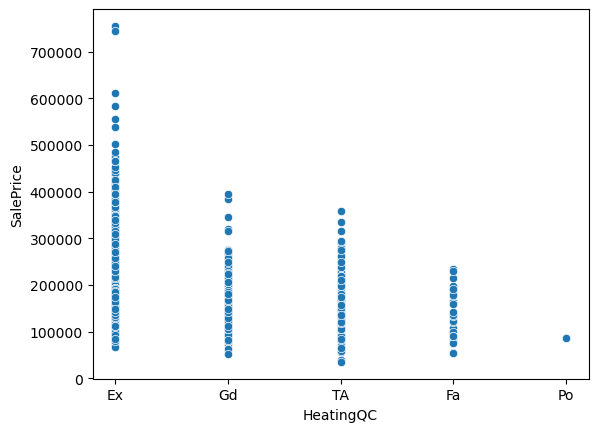

In [625]:
# scatter plot of HeatingQC and SalePrice
sns.scatterplot(x='HeatingQC', y='SalePrice', data=df)
plt.show()

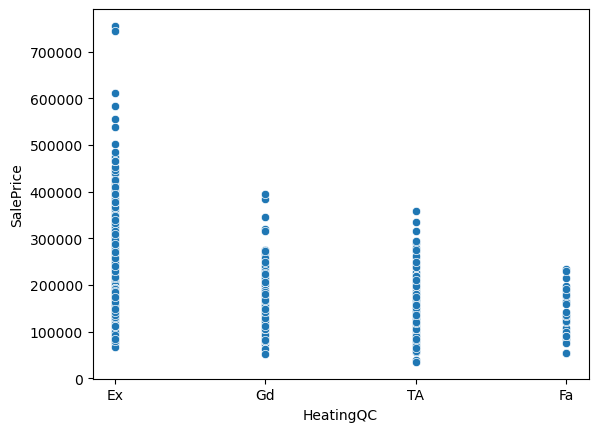

In [626]:
# drop the rows with HeatingQC value Po
df.drop(df[df['HeatingQC'] == 'Po'].index, inplace = True)

# draw a scatter plot of HeatingQC and SalePrice
sns.scatterplot(x='HeatingQC', y='SalePrice', data=df)
plt.show()

### 3.22 Electrical

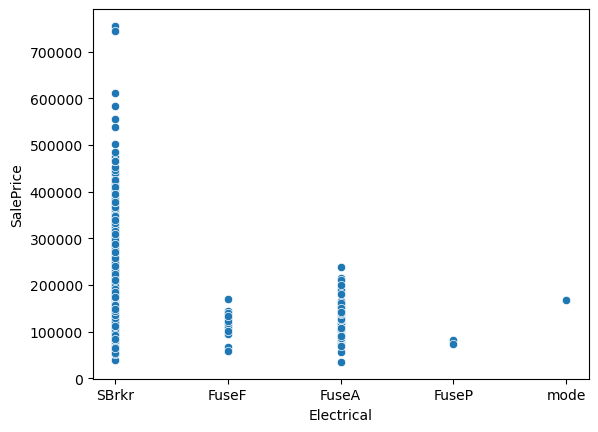

In [627]:
# scatter plot of Electrical and SalePrice
sns.scatterplot(x='Electrical', y='SalePrice', data=df)
plt.show()

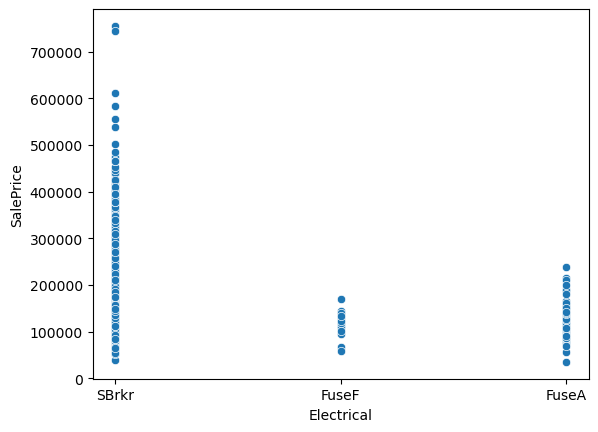

In [628]:
# drop the row with Electrical value FuseP
df.drop(df[df['Electrical'] == 'FuseP'].index, inplace = True)
df.drop(df[df['Electrical'] == 'mode'].index, inplace = True)

# draw a scatter plot of Electrical and SalePrice
sns.scatterplot(x='Electrical', y='SalePrice', data=df)
plt.show()

### 3.24 LowQualFinSF

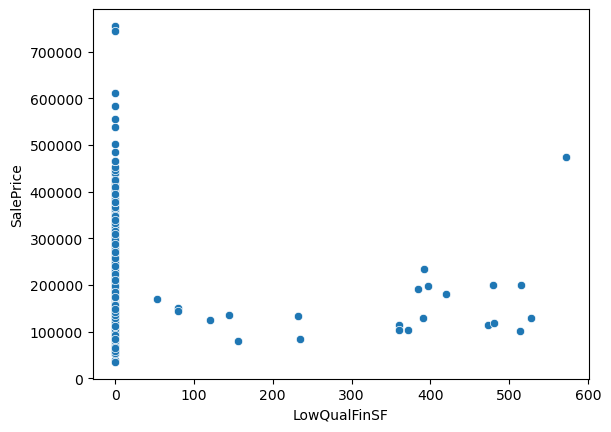

In [629]:
# scatter plot of LowQualFinSF and SalePrice
sns.scatterplot(x='LowQualFinSF', y='SalePrice', data=df)
plt.show()

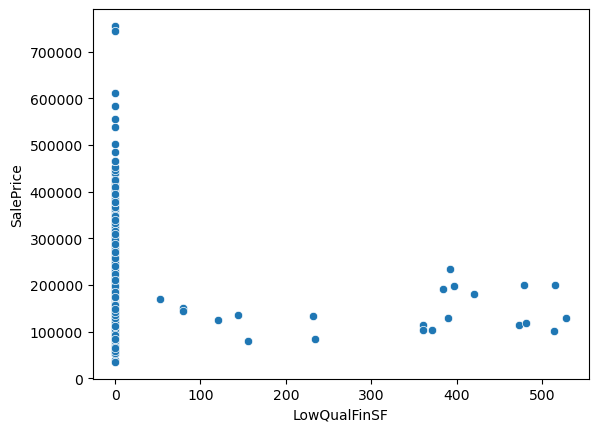

In [630]:
# drop the row with LowQualFinSF value over 550
df.drop(df[df['LowQualFinSF'] > 550].index, inplace = True)

# draw a scatter plot of LowQualFinSF and SalePrice
sns.scatterplot(x='LowQualFinSF', y='SalePrice', data=df)
plt.show()

### 3.26 BsmtFullBath

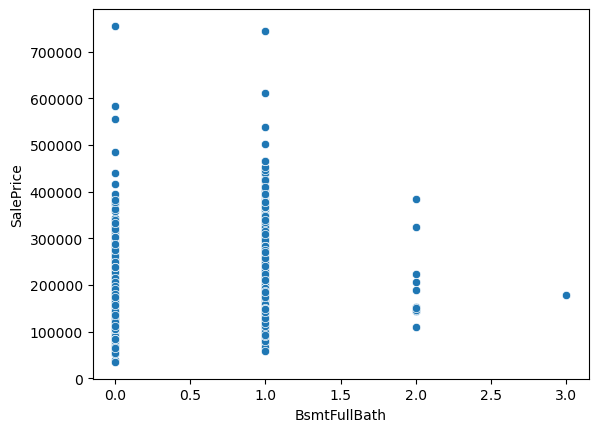

In [631]:
# draw a scatter plot of BsmtFullBath and SalePrice
sns.scatterplot(x='BsmtFullBath', y='SalePrice', data=df)
plt.show()

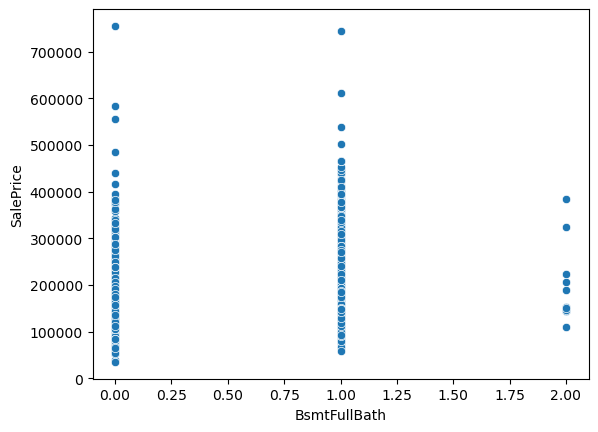

In [632]:
# drop the row with BsmtFullBath value 3
df.drop(df[df['BsmtFullBath'] == 3].index, inplace = True)

# draw a scatter plot of BsmtFullBath and SalePrice
sns.scatterplot(x='BsmtFullBath', y='SalePrice', data=df)
plt.show()

### 3.27 BsmtHalfBath

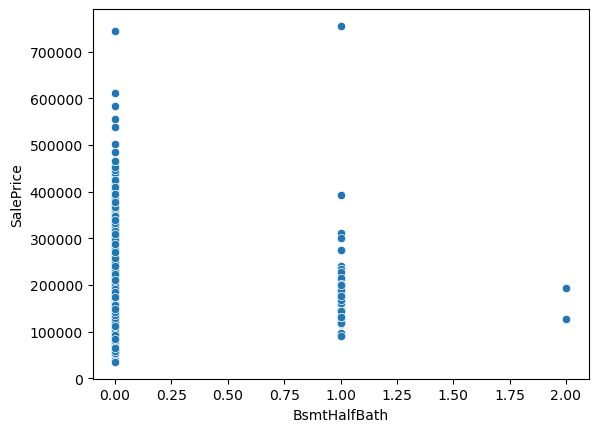

In [633]:
# scatter plot of BsmtHalfBath and SalePrice
sns.scatterplot(x='BsmtHalfBath', y='SalePrice', data=df)
plt.show()

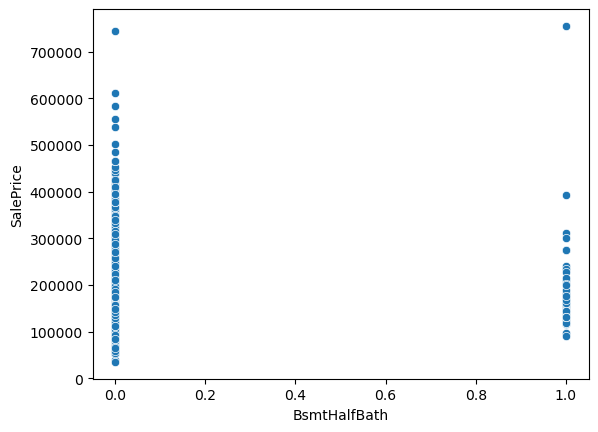

In [634]:
# drop the value in BsmtHalfBath 2
df.drop(df[df['BsmtHalfBath'] == 2].index, inplace = True)

# draw a scatter plot of BsmtHalfBath and SalePrice
sns.scatterplot(x='BsmtHalfBath', y='SalePrice', data=df)
plt.show()

### 3.28 FullBath

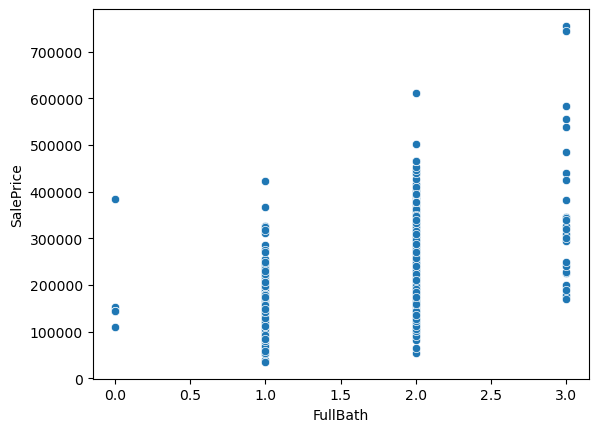

In [635]:
# scatter plot of FullBath and SalePrice
sns.scatterplot(x='FullBath', y='SalePrice', data=df)
plt.show()

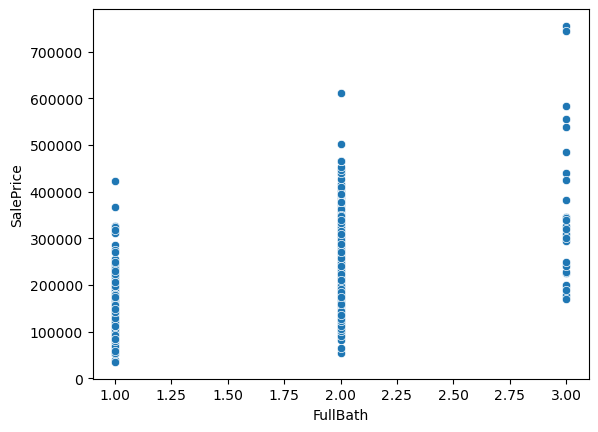

In [636]:
# drop the values in FUllBath 0
df.drop(df[df['FullBath'] == 0].index, inplace = True)

# draw a scatter plot of FullBath and SalePrice
sns.scatterplot(x='FullBath', y='SalePrice', data=df)
plt.show()

### 3.29 HalfBath

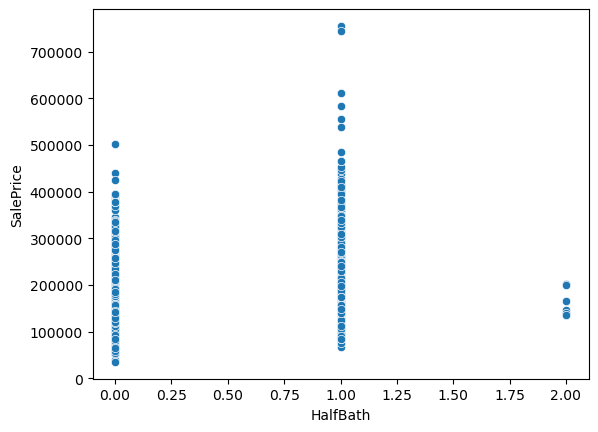

In [637]:
# scatter plot of HalfBath and SalePrice
sns.scatterplot(x='HalfBath', y='SalePrice', data=df)
plt.show()

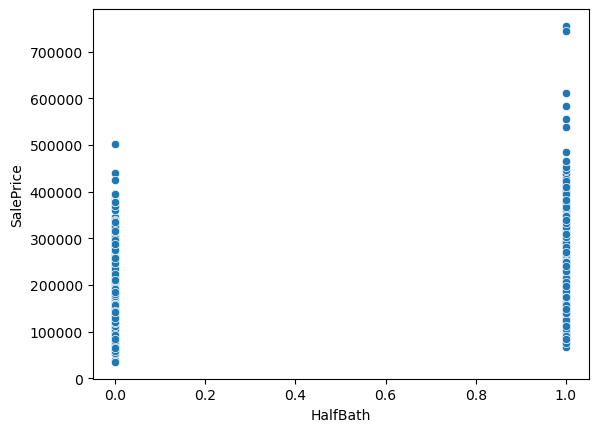

In [638]:
# drop the values in HalfBath 2
df.drop(df[df['HalfBath'] == 2].index, inplace = True)

# draw a scatter plot of HalfBath and SalePrice
sns.scatterplot(x='HalfBath', y='SalePrice', data=df)
plt.show()

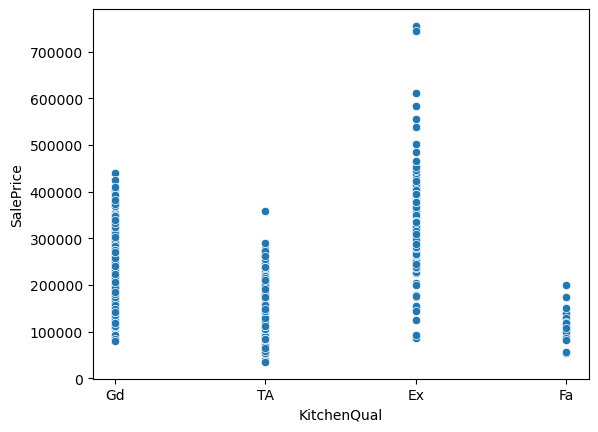

In [639]:
# scatter plot of KitchenQual and SalePrice
sns.scatterplot(x='KitchenQual', y='SalePrice', data=df)
plt.show()

### 3.30 TotRmsAbvGrd

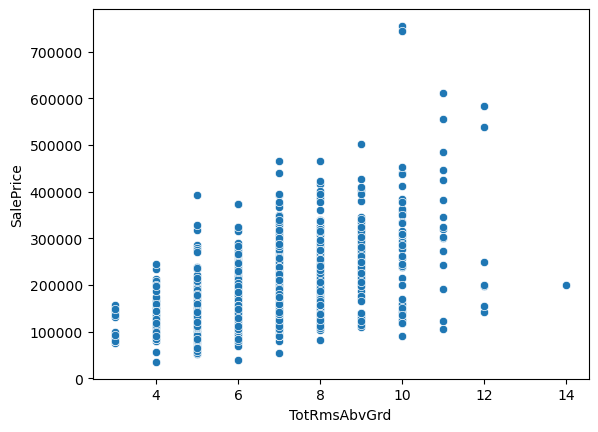

In [640]:
# scatter plot of TotRmsAbvGrd and SalePrice
sns.scatterplot(x='TotRmsAbvGrd', y='SalePrice', data=df)
plt.show()

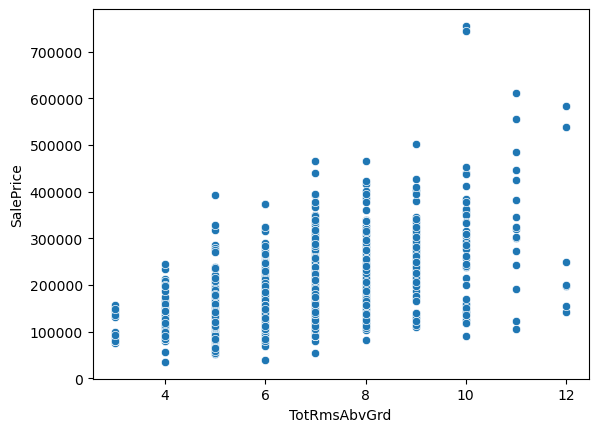

In [641]:
# drop the row with TotRmsAbvGrd value over 13
df.drop(df[df['TotRmsAbvGrd'] > 13].index, inplace = True)

# draw a scatter plot of TotRmsAbvGrd and SalePrice
sns.scatterplot(x='TotRmsAbvGrd', y='SalePrice', data=df)
plt.show()

### 3.31 Functional

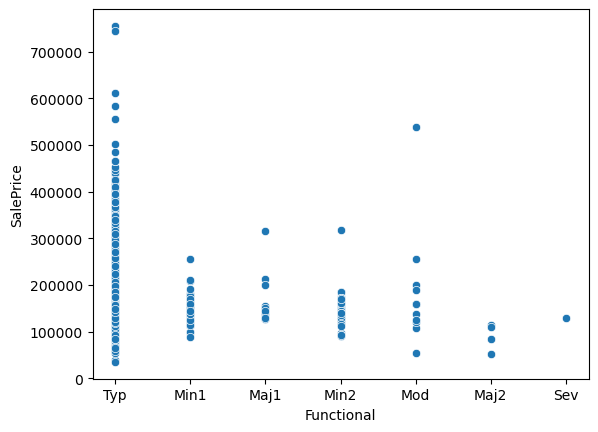

In [642]:
# scatter plot of Functional and SalePrice
sns.scatterplot(x='Functional', y='SalePrice', data=df)
plt.show()

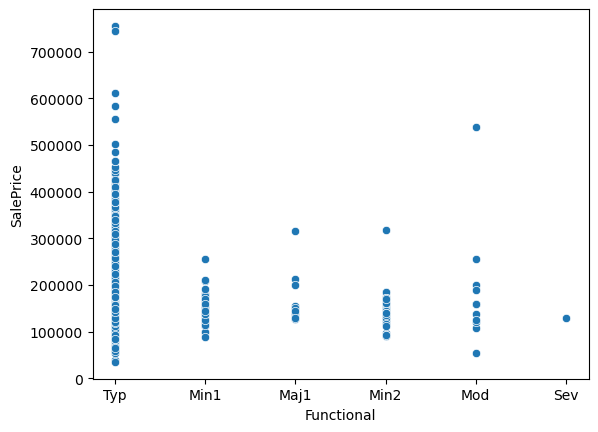

In [643]:
# drop the row with Functional value Sev
df.drop(df[df['Functional'] == 'Maj2'].index, inplace = True)

# draw a scatter plot of Functional and SalePrice
sns.scatterplot(x='Functional', y='SalePrice', data=df)
plt.show()

### 3.32 Fireplaces

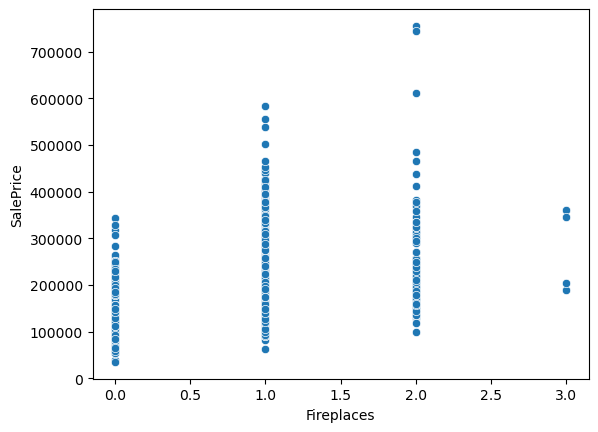

In [644]:
# scatter plot of Fireplaces and SalePrice
sns.scatterplot(x='Fireplaces', y='SalePrice', data=df)
plt.show()

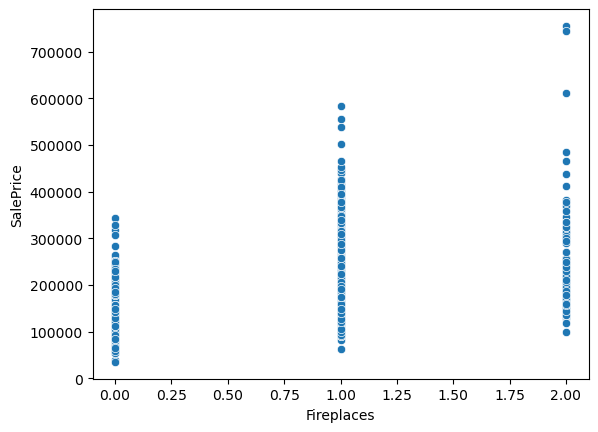

In [645]:
# drop the row with Fireplaces value over 3
df.drop(df[df['Fireplaces'] > 2.5].index, inplace = True)

sns.scatterplot(x='Fireplaces', y='SalePrice', data=df)
plt.show()

### 3.33 GarageType

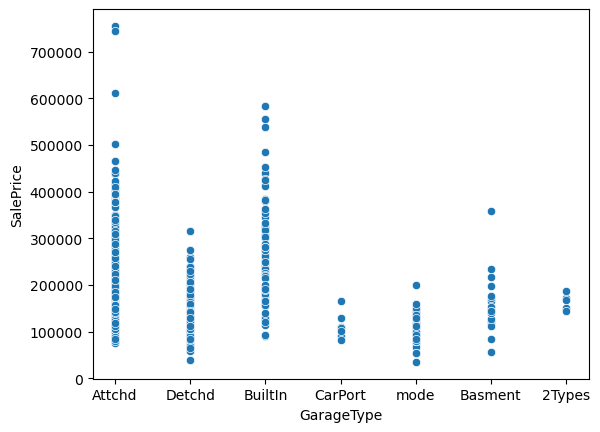

In [646]:
# draw a scatter plot of GarageType and SalePrice
sns.scatterplot(x='GarageType', y='SalePrice', data=df)
plt.show()

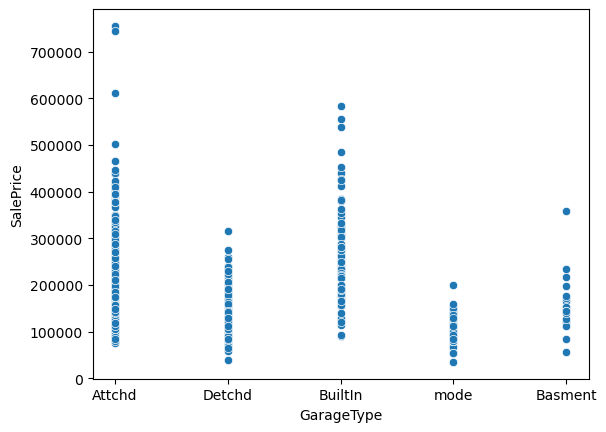

In [647]:
# drop the row with GarageType value 2
df.drop(df[df['GarageType'] == '2Types'].index, inplace = True)
df.drop(df[df['GarageType'] == 'CarPort'].index, inplace = True)

sns.scatterplot(x='GarageType', y='SalePrice', data=df)
plt.show()

### 3.34 GarageCars

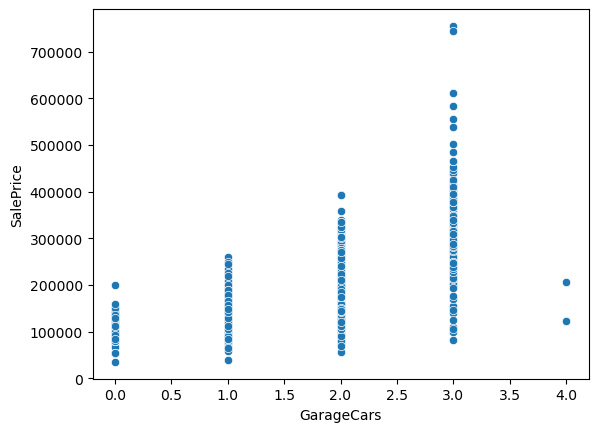

In [648]:
# scatter plot of GarageCars and SalePrice
sns.scatterplot(x='GarageCars', y='SalePrice', data=df)
plt.show()

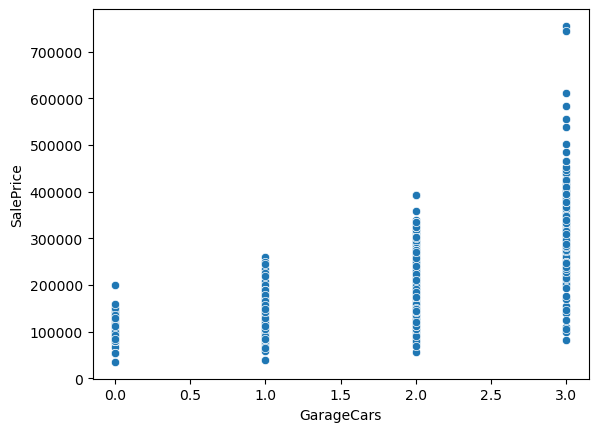

In [649]:
# drop the row with GarageCars value over 3.5
df.drop(df[df['GarageCars'] > 3.5].index, inplace = True)

# draw a scatter plot of GarageCars and SalePrice
sns.scatterplot(x='GarageCars', y='SalePrice', data=df)
plt.show()

### 3.35 GarageArea

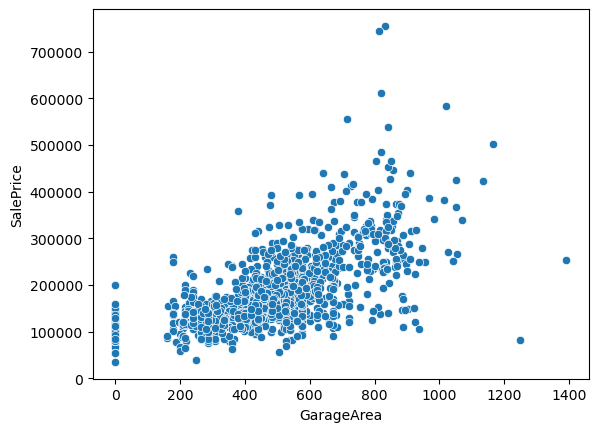

In [650]:
# draw a scatter plot of GarageArea and SalePrice
sns.scatterplot(x='GarageArea', y='SalePrice', data=df)
plt.show()

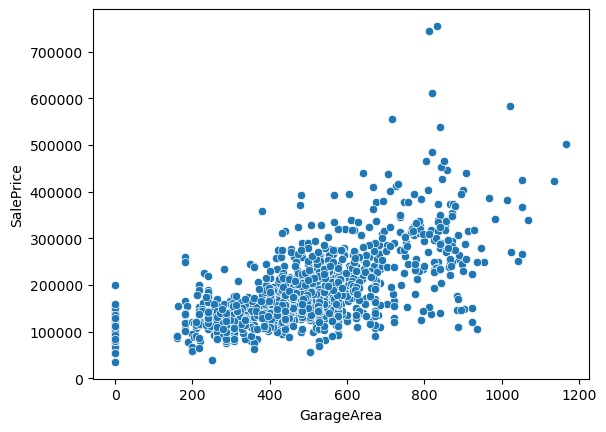

In [651]:
# drop the row with GarageArea value over 1200
df.drop(df[df['GarageArea'] > 1200].index, inplace = True)

# draw a scatter plot of GarageArea and SalePrice
sns.scatterplot(x='GarageArea', y='SalePrice', data=df)
plt.show()

### 3.36 GarageQual

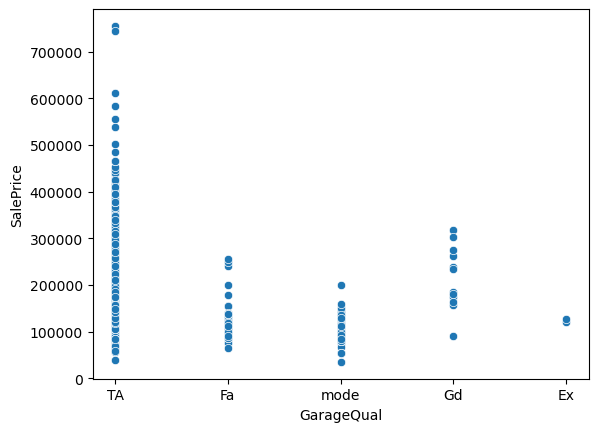

In [652]:
# draw a scatter plot of GarageQual and SalePrice
sns.scatterplot(x='GarageQual', y='SalePrice', data=df)
plt.show()

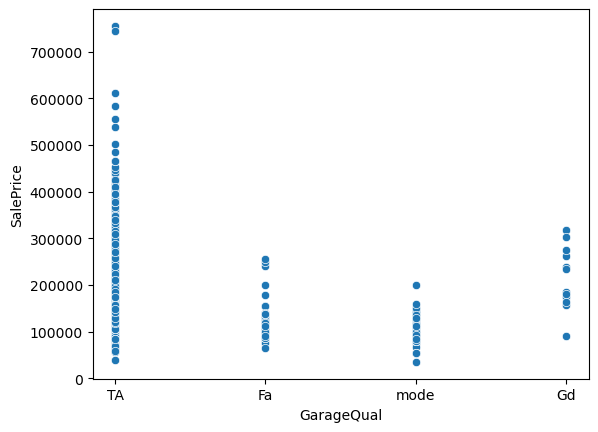

In [653]:
# drop the row with GarageQual value Ex and Po
df.drop(df[df['GarageQual'] == 'Ex'].index, inplace = True)
df.drop(df[df['GarageQual'] == 'Po'].index, inplace = True)

# draw a scatter plot of GarageQual and SalePrice
sns.scatterplot(x='GarageQual', y='SalePrice', data=df)
plt.show()

### 3.37 GarageCond

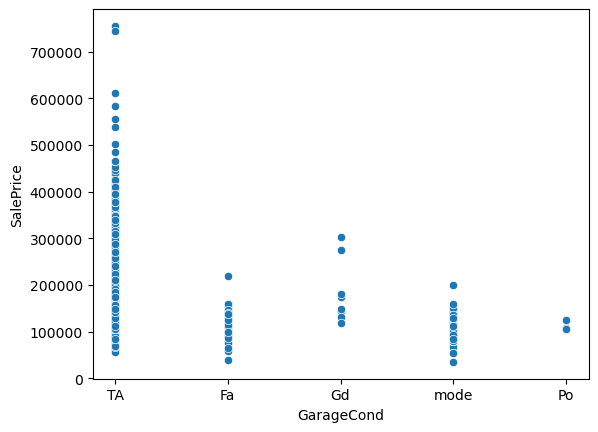

In [654]:
# draw a scatter plot of GarageCond and SalePrice
sns.scatterplot(x='GarageCond', y='SalePrice', data=df)
plt.show()

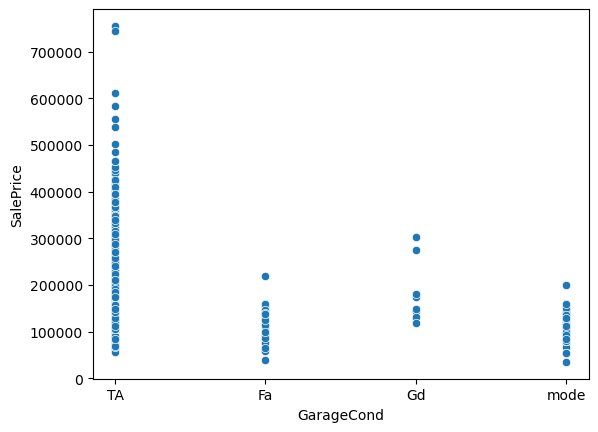

In [655]:
# drop the row with GarageCond value Po
df.drop(df[df['GarageCond'] == 'Po'].index, inplace = True)

# draw a scatter plot of GarageCond and SalePrice
sns.scatterplot(x='GarageCond', y='SalePrice', data=df)
plt.show()

### 3.38 OpenPorchSF

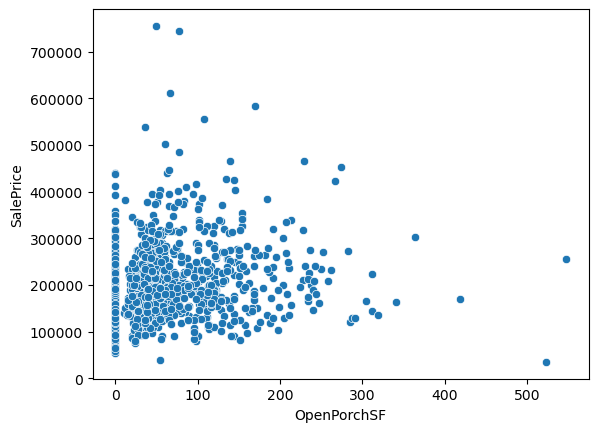

In [656]:
# draw a scatter plot of OpenPorchSF and SalePrice
sns.scatterplot(x='OpenPorchSF', y='SalePrice', data=df)
plt.show()

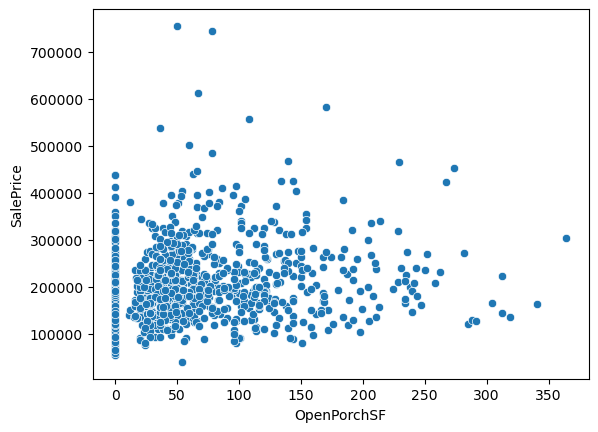

In [657]:
# drop the row with OpenPorchSF value over 400
df.drop(df[df['OpenPorchSF'] > 400].index, inplace = True)

# draw a scatter plot of OpenPorchSF and SalePrice
sns.scatterplot(x='OpenPorchSF', y='SalePrice', data=df)
plt.show()

### 3.39 EnclosedPorch

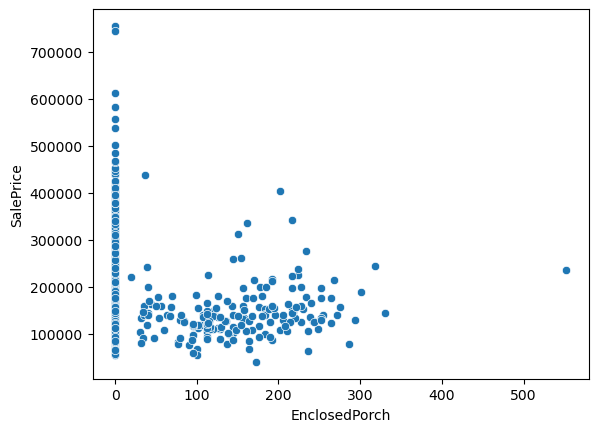

In [658]:
# draw a scatter plot of EnclosedPorch and SalePrice
sns.scatterplot(x='EnclosedPorch', y='SalePrice', data=df)
plt.show()

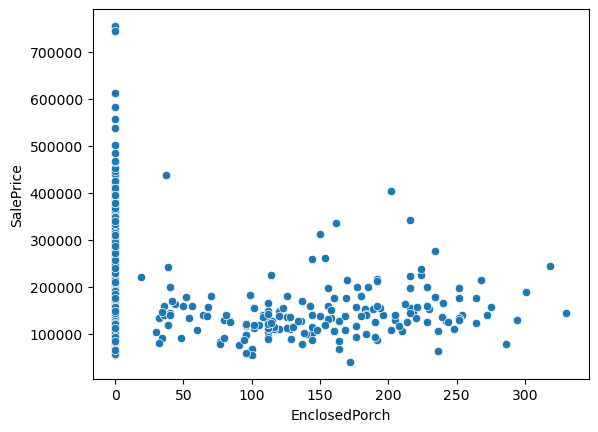

In [659]:
# drop the row with EnclosedPorch value over 500
df.drop(df[df['EnclosedPorch'] > 500].index, inplace = True)

sns.scatterplot(x='EnclosedPorch', y='SalePrice', data=df)
plt.show()

### 3.40 3SsnPorch

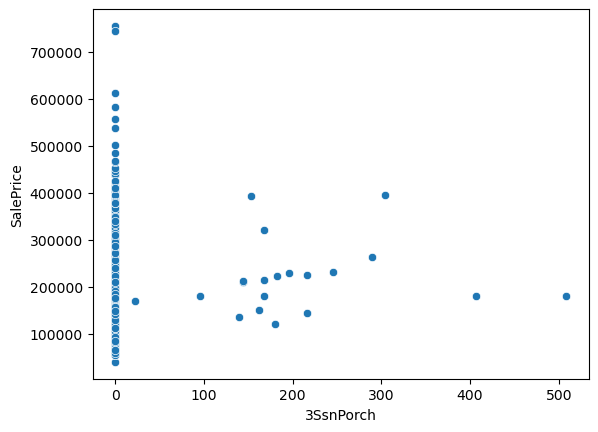

In [660]:
# draw a scatter plot of 3SsnPorch and SalePrice
sns.scatterplot(x='3SsnPorch', y='SalePrice', data=df)
plt.show()

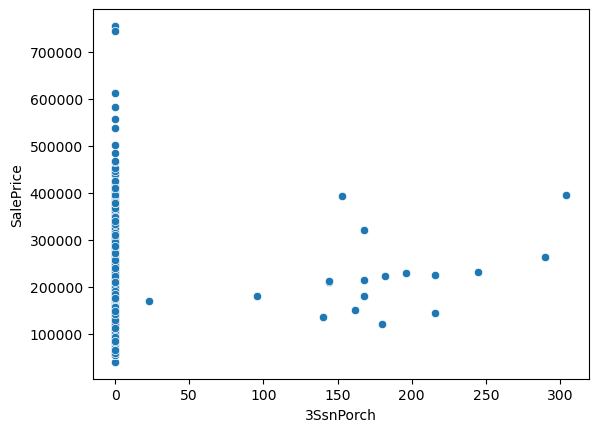

In [661]:
# drop the row with 3SsnPorch value over 350
df.drop(df[df['3SsnPorch'] > 350].index, inplace = True)

# draw a scatter plot of 3SsnPorch and SalePrice
sns.scatterplot(x='3SsnPorch', y='SalePrice', data=df)
plt.show()

### 3.41 PoolArea

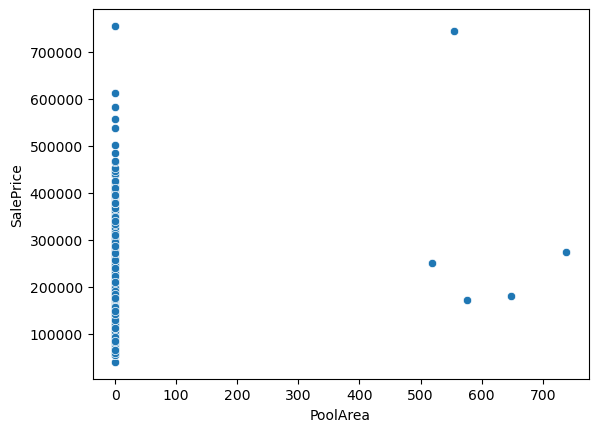

In [662]:
# scatter plot of PoolArea and SalePrice
sns.scatterplot(x='PoolArea', y='SalePrice', data=df)
plt.show()

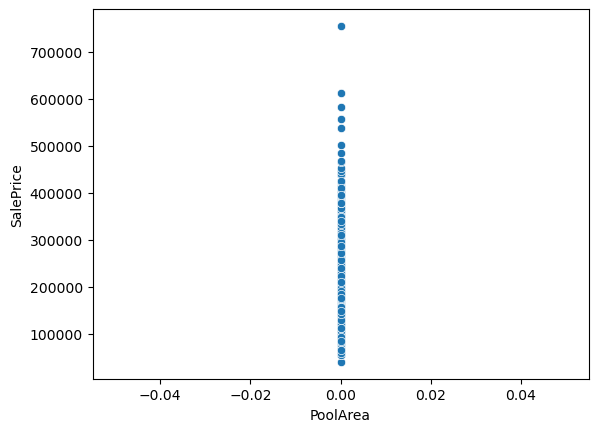

In [663]:
# drop the row with PoolArea value over 400
df.drop(df[df['PoolArea'] > 400].index, inplace = True)

# draw a scatter plot of PoolArea and SalePrice
sns.scatterplot(x='PoolArea', y='SalePrice', data=df)
plt.show()

### 3.42 MiscVal

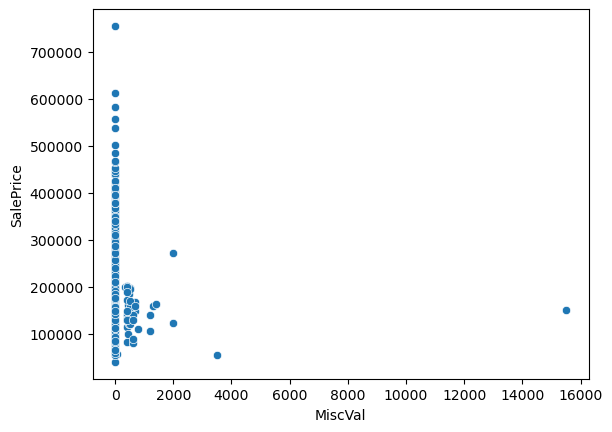

In [664]:
# draw a scatter plot of MiscVal and SalePrice
sns.scatterplot(x='MiscVal', y='SalePrice', data=df)
plt.show()

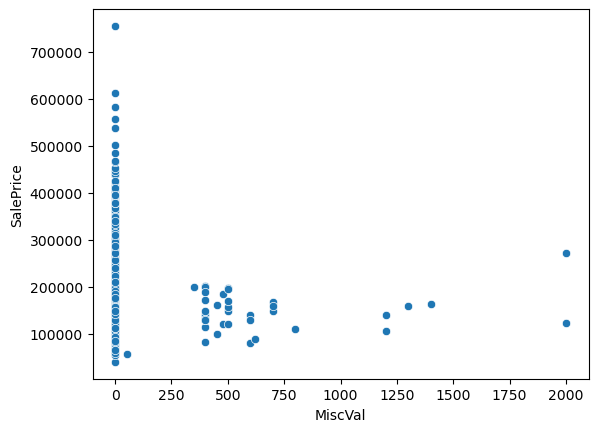

In [665]:
# drop the row with MiscVal value over 2000
df.drop(df[df['MiscVal'] > 2000].index, inplace = True)

# draw a scatter plot of MiscVal and SalePrice
sns.scatterplot(x='MiscVal', y='SalePrice', data=df)
plt.show()

### 3.43 SaleType

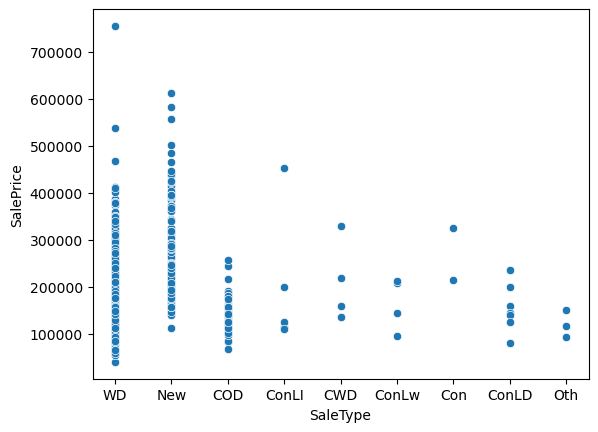

In [666]:
# draw a scatter plot of saletype and SalePrice
sns.scatterplot(x='SaleType', y='SalePrice', data=df)
plt.show()

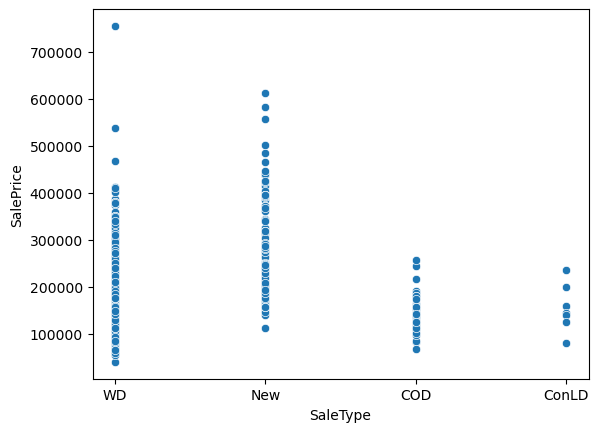

In [667]:
# drop the row with saletype value CWD, ConLl, ConLD, Oth, ConLw
df.drop(df[df['SaleType'] == 'CWD'].index, inplace = True)
df.drop(df[df['SaleType'] == 'ConLI'].index, inplace = True)
df.drop(df[df['SaleType'] == 'Oth'].index, inplace = True)
df.drop(df[df['SaleType'] == 'ConLw'].index, inplace = True)
df.drop(df[df['SaleType'] == 'Con'].index, inplace = True)

sns.scatterplot(x='SaleType', y='SalePrice', data=df)
plt.show()

### 3.44 SaleCondition

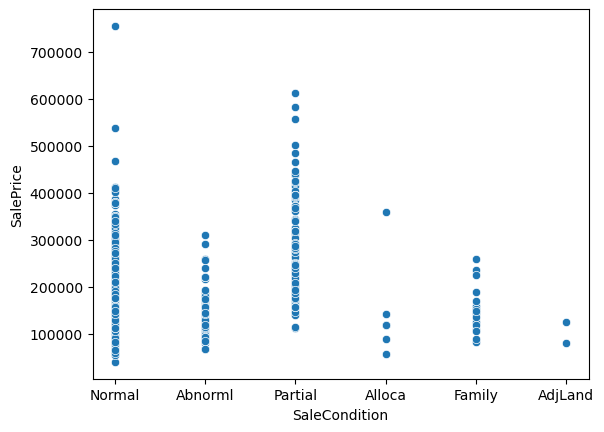

In [668]:
# draw a scatter plot of salecondition and SalePrice
sns.scatterplot(x='SaleCondition', y='SalePrice', data=df)
plt.show()

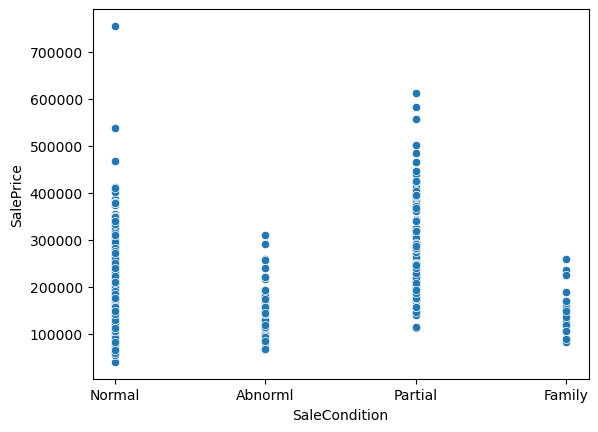

In [669]:
# drop the row with salecondition value AdjLand
df.drop(df[df['SaleCondition'] == 'AdjLand'].index, inplace = True)
df.drop(df[df['SaleCondition'] == 'Alloca'].index, inplace = True)

# draw a scatter plot of salecondition and SalePrice
sns.scatterplot(x='SaleCondition', y='SalePrice', data=df)
plt.show()

## 4 Heatmap

c:\Users\Vishaly\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

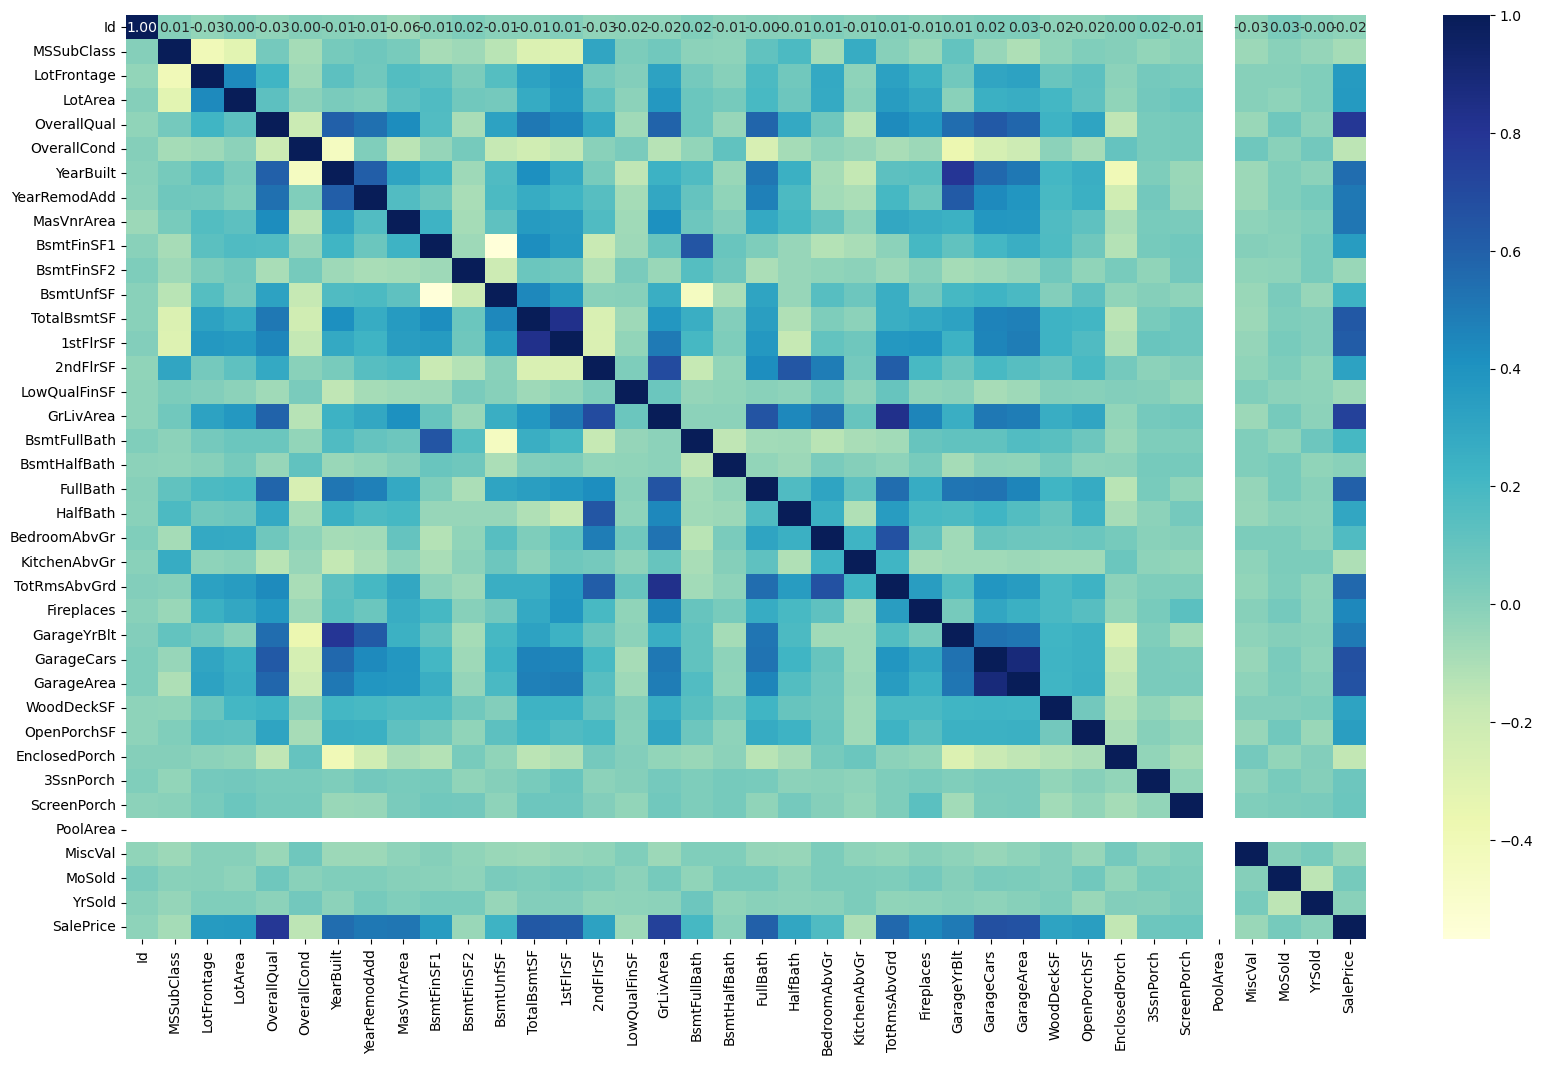

In [670]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr(numeric_only=True) # correlation matrix
plt.figure(figsize=(20, 12)) # set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu",fmt=".2f") # draw the heatmap

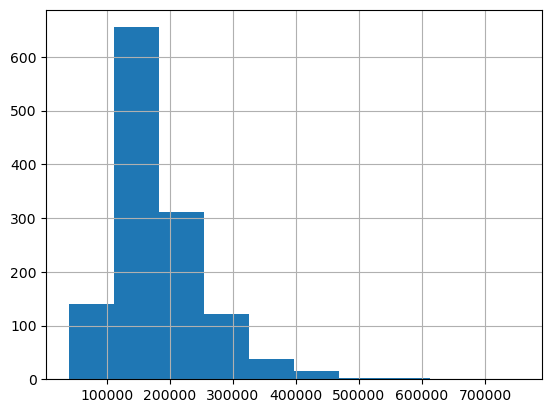

In [671]:
# draw a histogram of SalePrice
df['SalePrice'].hist()
plt.show()

In [672]:
# drop the row with SalePrice value over 500000
#df.drop(df[df['SalePrice'] > 500000].index, inplace = True)

# draw a histogram of SalePrice
#df['SalePrice'].hist()
#plt.show()

### 4.1 Removing irrelevant columns

In [673]:
# drop the column YrSold, BsmtHalfBath, LowQualFinSF, BsmtFinSF2
df = df.drop(['YrSold', 'LotShape', 'CentralAir', '3SsnPorch', 
              'PoolArea', 'MiscVal', 'MoSold', 'MSSubClass', 
              'BsmtFinSF2', 'BsmtHalfBath', 'LowQualFinSF','BsmtQual', 
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                  'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'], axis=1)

### 4.2 Encoding

In [674]:
# list all the unique values in each of the categorical columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")

MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street: ['Pave' 'Grvl']
LandContour: ['Lvl' 'Bnk' 'HLS' 'Low']
Utilities: ['AllPub']
LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope: ['Gtl' 'Mod' 'Sev']
Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Somerst' 'NWAmes' 'OldTown'
 'Sawyer' 'NridgHt' 'NAmes' 'BrkSide' 'SawyerW' 'IDOTRR' 'MeadowV'
 'Timber' 'Mitchel' 'Gilbert' 'StoneBr' 'ClearCr' 'Edwards' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU']
Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRAn' 'PosA' 'RRNn']
Condition2: ['Norm' 'Feedr']
BldgType: ['1Fam' 'TwnhsE' '2fmCon' 'Twnhs' 'Duplex']
HouseStyle: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle: ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat']
RoofMatl: ['CompShg' 'WdShake' 'Tar&Grv' 'WdShngl']
Exterior1st: ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'Stucco' 'AsbShng']
Exterior2nd: ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'Cme

In [675]:
# convert the categorical columns to numerical columns using ordinal encoding
df['MSZoning'] = df['MSZoning'].map({'RL':0, 'RM':1, 'C (all)':2, 'FV':3, 'RH' :4})
df['Street'] = df['Street'].map({'Pave':0, 'Grvl':1})
df['LandContour'] = df['LandContour'].map({'Lvl':0, 'Bnk':1, 'HLS':2, 'Low':3})
df['Utilities'] = df['Utilities'].map({'AllPub':0, 'NoSeWa':1})
df['LotConfig'] = df['LotConfig'].map({'Inside':0, 'Corner':1, 'CulDSac':2, 'FR2':3, 'FR3':4})
df['LandSlope'] = df['LandSlope'].map({'Gtl':0, 'Mod':1, 'Sev':2})
df['Neighborhood'] = df['Neighborhood'].map({'CollgCr':0, 'Veenker':1, 'Crawfor':2, 'NoRidge':3, 'Mitchel':4,
       'Somerst':5, 'NWAmes':6, 'OldTown':7, 'BrkSide':8, 'Sawyer':9, 'NridgHt':10,
       'NAmes':11, 'SawyerW':12, 'IDOTRR':13, 'MeadowV':14, 'Edwards':15, 'Timber':16,
       'Gilbert':17, 'StoneBr':18, 'ClearCr':19, 'NPkVill':20, 'Blmngtn':21, 'BrDale':22,
       'SWISU':23, 'Blueste':24})
df['Condition1'] = df['Condition1'].map({'Norm':0, 'Feedr':1, 'PosN':2, 'Artery':3, 'RRAe':4, 'PosA':5,
       'RRNn':6, 'RRAn':7, 'RRNe':8})
df['Condition2'] = df['Condition2'].map({'Norm':0, 'Artery':1, 'RRNn':2, 'Feedr':3, 'PosN':4, 'PosA':5,
       'RRAn':6, 'RRAe':7})
df['BldgType'] = df['BldgType'].map({'1Fam':0, '2fmCon':1, 'Duplex':2, 'Twnhs':3, 'TwnhsE':4})
df['HouseStyle'] = df['HouseStyle'].map({'1Story':0, '1.5Fin':1, '1.5Unf':2, '2Story':3, '2.5Fin':4, '2.5Unf':5,
       'SFoyer':6, 'SLvl':7})
df['RoofStyle'] = df['RoofStyle'].map({'Gable':0, 'Hip':1, 'Gambrel':2, 'Mansard':3, 'Flat':4, 'Shed':5})
df['RoofMatl'] = df['RoofMatl'].map({'CompShg':0, 'WdShngl':1, 'Metal':2, 'WdShake':3, 'ClyTile':4, 'Membran':5,
       'Roll':6, 'Tar&Grv':7})
df['Exterior1st'] = df['Exterior1st'].map({'VinylSd':0, 'HdBoard':1, 'MetalSd':2, 'Wd Sdng':3, 'Plywood':4, 'CemntBd':5,
       'BrkFace':6, 'WdShing':7, 'AsbShng':8, 'Stucco':9, 'BrkComm':10, 'AsphShn':11, 'Stone':12,
       'ImStucc':13})
df['Exterior2nd'] = df['Exterior2nd'].map({'VinylSd':0, 'HdBoard':1, 'MetalSd':2, 'Wd Sdng':3, 'Plywood':4, 'CmentBd':5,
       'Wd Shng':6, 'BrkFace':7, 'Stucco':8, 'AsbShng':9, 'Brk Cmn':10, 'ImStucc':11, 'AsphShn':12,
       'Stone':13, 'Other':14})
df['ExterQual'] = df['ExterQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df['ExterCond'] = df['ExterCond'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df['Foundation'] = df['Foundation'].map({'PConc':0, 'CBlock':1, 'BrkTil':2, 'Wood':3, 'Slab':4, 'Stone':5})
df['HeatingQC'] = df['HeatingQC'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df['Electrical'] = df['Electrical'].map({'Mix':0, 'FuseP':1, 'FuseF':2, 'FuseA':3, 'SBrkr':4})
df['KitchenQual'] = df['KitchenQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df['Functional'] = df['Functional'].map({'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7})
df['PavedDrive'] = df['PavedDrive'].map({'N':0, 'P':1, 'Y':2})
df['SaleType'] = df['SaleType'].map({'WD':0, 'CWD':1, 'VWD':2, 'New':3, 'COD':4, 'Con':5, 'ConLw':6, 'ConLI':7, 'ConLD':8, 'Oth':9})
df['SaleCondition'] = df['SaleCondition'].map({'Normal':0, 'Abnorml':1, 'AdjLand':2, 'Alloca':3, 'Family':4, 'Partial':5})
df['Heating'] = df['Heating'].map({'GasA':0, 'GasW':1, 'Grav':2, 'Wall':3, 'OthW':4})

In [676]:
# list nurmerical columns
df.select_dtypes(exclude='object').columns

Index(['Id', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'SaleType', 'SaleCondition',
       'SalePrice'],
      dtype='object')

In [677]:
# display columns which are not numerical
df.select_dtypes('object').columns

Index([], dtype='object')

In [678]:
df.head()

Id  MSZoning  LotFrontage  LotArea  Street  LandContour  Utilities  \
0   1         0         65.0     8450       0            0          0   
1   2         0         80.0     9600       0            0          0   
2   3         0         68.0    11250       0            0          0   
3   4         0         60.0     9550       0            0          0   
4   5         0         84.0    14260       0            0          0   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0          0          0             0           0           0         0   
1          3          0             1           1           0         0   
2          0          0             0           0           0         0   
3          1          0             2           0           0         0   
4          3          0             3           0           0         0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0           3            7            5       2003          2003          0   
1           0            6            8       1976          1976          0   
2           3            7            5       2001          2002          0   
3           3            7            5       1915          1970          0   
4           3            8            5       2000          2000          0   

   RoofMatl  Exterior1st  Exterior2nd  MasVnrArea  ExterQual  ExterCond  \
0         0            0            0       196.0          3          2   
1         0            2            2         0.0          2          2   
2         0            0            0       162.0          3          2   
3         0            3            6         0.0          2          2   
4         0            0            0       350.0          3          2   

   Foundation  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  \
0           0         706        150          856        0          4   
1           1         978        284         1262        0          4   
2           0         486        434          920        0          4   
3           2         216        540          756        0          3   
4           0         655        490         1145        0          4   

   Electrical  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  \
0           4       856       854       1710             1         2   
1           4      1262         0       1262             0         2   
2           4       920       866       1786             1         2   
3           4       961       756       1717             1         1   
4           4      1145      1053       2198             1         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         1             3             1            3             8   
1         0             3             1            2             6   
2         1             3             1            3             6   
3         0             3             1            3             7   
4         1             4             1            3             9   

   Functional  Fireplaces  GarageYrBlt  GarageCars  GarageArea  PavedDrive  \
0           7           0       2003.0           2         548           2   
1           7           1       1976.0           2         460           2   
2           7           1       2001.0           2         608           2   
3           7           1       1998.0           3         642           2   
4           7           1       2000.0           3         836           2   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  SaleType  \
0           0           61              0            0         0   
1         298            0              0            0         0   
2           0           42              0            0         0   
3           0           35            272            0         0   
4         192           84              0            0         0   

   SaleCondition

## 5 Data Spliting

In [679]:
# Get all column names except 'SalePrice'
columns_except_saleprice = [col for col in df.columns if col!= 'SalePrice']

# Use these column names to create X
X = df[columns_except_saleprice]  # Make sure 'df' is used here instead of 'data'
y = df['SalePrice']

# shape of X and y
print(X.shape)
print(y.shape)

(1288, 54)
(1288,)


In [680]:
# training and testing split
from sklearn.model_selection import train_test_split # import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 70% training and 30% testing

In [681]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# import BayesianRidge and KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor

In [682]:
# list of numerical columns
num_cols = df.select_dtypes(exclude='object').columns

# Feature scaling
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [683]:
# Imputer with hyperparameter tuning
imputer = IterativeImputer(random_state=42)
param_grid = {
    'estimator': [BayesianRidge(), KNeighborsRegressor()],
    'max_iter': [10, 20, 30],
    'initial_strategy': ['mean', 'median']
}
grid_search = GridSearchCV(imputer, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(df[num_cols])

# Use the best estimator
best_imputer = grid_search.best_estimator_
df[num_cols] = best_imputer.transform(df[num_cols])


c:\Users\Vishaly\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Vishaly\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
c:\Users\Vishaly\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Vishaly\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call

## 6 Training the model

In [684]:
print(df.columns.tolist()) # display all columns

['Id', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SaleType', 'SaleCondition', 'SalePrice']


In [685]:
# Set the maximum number of columns displayed to None
pd.set_option('display.max_columns', None)

In [686]:
print(X_train)

        Id  MSZoning  LotFrontage  LotArea  Street  LandContour  Utilities  \
729    730         1    52.000000     6240       0            0          0   
774    775         0   110.000000    14226       0            0          0   
937    938         0    75.000000     9675       0            0          0   
1306  1307         0    48.000000     6955       0            0          0   
150    151         0   120.000000    10356       0            0          0   
...    ...       ...          ...      ...     ...          ...        ...   
1185  1186         0    60.000000     9738       0            0          0   
1245  1246         0    78.000000    12090       0            0          0   
1284  1285         0    50.000000     9638       0            0          0   
980    981         0    70.049958    12122       0            0          0   
1279  1280         2    60.000000     7500       0            0          0   

      LotConfig  LandSlope  Neighborhood  Condition1  Condition

In [687]:
# use multiple models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Lasso Regression': Lasso(),
    'XGBoost': XGBRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' trained.')

Linear Regression trained.


Random Forest trained.
Gradient Boosting trained.
Lasso Regression trained.


c:\Users\Vishaly\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.883e+11, tolerance: 5.823e+08
  model = cd_fast.enet_coordinate_descent(


XGBoost trained.


In [688]:
# show the best model
from sklearn.metrics import r2_score
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(name + ' R2 score: ' + str(r2_score(y_test, y_pred)))

Linear Regression R2 score: 0.8762277770468891
Random Forest R2 score: 0.8604016725832587
Gradient Boosting R2 score: 0.8735882308755007
Lasso Regression R2 score: 0.876266044640587
XGBoost R2 score: 0.878719374572901


In [689]:
# fit the model with multiple linear regression
#from sklearn.linear_model import LinearRegression
#model = LinearRegression()
#model.fit(X_train, y_train)

In [690]:
# use Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [691]:
# make predictions
y_pred = model.predict(X_test)

In [692]:
# evaluate the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')

Mean Squared Error: 664023866.5771475
Root Mean Squared Error: 25768.660550698933
Mean Absolute Error: 16147.4659681264
R2 Score: 0.8751068406262308


## 7 Testing Data

In [693]:
# load the data
submission_data = pd.read_csv('data/test.csv')
submission_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

## 8 Preprocessing test data

### 8.1 Irrelevant columns

In [694]:
# drop the column YrSold, BsmtHalfBath, LowQualFinSF, BsmtFinSF2
submission_data = submission_data.drop(['YrSold', 'LotShape', 'CentralAir', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'MSSubClass', 'OverallCond', 'BsmtFinSF2', 'BsmtHalfBath', 'LowQualFinSF'], axis=1)

In [695]:
# drop the columns that were dropped to train the model
submission_data = submission_data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType'], axis=1)

In [696]:
# display only the columns with missing values
submission_data.isna().sum()[submission_data.isna().sum() > 0]

MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrArea       15
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinSF1        1
BsmtFinType2     42
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
KitchenQual       1
Functional        2
GarageType       76
GarageYrBlt      78
GarageFinish     78
GarageCars        1
GarageArea        1
GarageQual       78
GarageCond       78
SaleType          1
dtype: int64

### 8.2 Missing values

In [697]:
# drop all the columns with missing values above 45%
submission_data = submission_data.dropna(thresh=0.55*len(df), axis=1)

In [698]:
# display the catergorical columns with missing values
submission_data.select_dtypes('object').isna().sum()[submission_data.select_dtypes('object').isna().sum() > 0]

MSZoning         4
Utilities        2
Exterior1st      1
Exterior2nd      1
BsmtQual        44
BsmtCond        45
BsmtExposure    44
BsmtFinType1    42
BsmtFinType2    42
KitchenQual      1
Functional       2
GarageType      76
GarageFinish    78
GarageQual      78
GarageCond      78
SaleType         1
dtype: int64

In [699]:
# impute the missing in the categorical columns with the mode
submission_data['MSZoning'] = submission_data['MSZoning'].fillna(submission_data['MSZoning'].mode()[0])
submission_data['Utilities'] = submission_data['Utilities'].fillna(submission_data['Utilities'].mode()[0])
submission_data['Exterior1st'] = submission_data['Exterior1st'].fillna(submission_data['Exterior1st'].mode()[0])
submission_data['Exterior2nd'] = submission_data['Exterior2nd'].fillna(submission_data['Exterior2nd'].mode()[0])
submission_data['KitchenQual'] = submission_data['KitchenQual'].fillna(submission_data['KitchenQual'].mode()[0])
submission_data['BsmtQual'] = submission_data['BsmtQual'].fillna(submission_data['BsmtQual'].mode()[0])
submission_data['BsmtCond'] = submission_data['BsmtCond'].fillna(submission_data['BsmtCond'].mode()[0])
submission_data['BsmtExposure'] = submission_data['BsmtExposure'].fillna(submission_data['BsmtExposure'].mode()[0])
submission_data['BsmtFinType1'] = submission_data['BsmtFinType1'].fillna(submission_data['BsmtFinType1'].mode()[0])
submission_data['BsmtFinType2'] = submission_data['BsmtFinType2'].fillna(submission_data['BsmtFinType2'].mode()[0])
submission_data['KitchenQual'] = submission_data['KitchenQual'].fillna(submission_data['KitchenQual'].mode()[0])
submission_data['Functional'] = submission_data['Functional'].fillna(submission_data['Functional'].mode())
submission_data['GarageType'] = submission_data['GarageType'].fillna(submission_data['GarageType'].mode()[0])
submission_data['GarageFinish'] = submission_data['GarageFinish'].fillna(submission_data['GarageFinish'].mode()[0])
submission_data['GarageQual'] = submission_data['GarageQual'].fillna(submission_data['GarageQual'].mode()[0])
submission_data['GarageCond'] = submission_data['GarageCond'].fillna(submission_data['GarageCond'].mode()[0])
submission_data['SaleType'] = submission_data['SaleType'].fillna(submission_data['SaleType'].mode()[0])
submission_data['Functional'] = submission_data['Functional'].fillna(submission_data['Functional'].mode()[0])

In [700]:
# display the missing values in the categorical columns
submission_data.select_dtypes('object').isna().sum()[submission_data.select_dtypes('object').isna().sum() > 0]

Series([], dtype: int64)

In [701]:
# display the missing values in the numerical columns
submission_data.select_dtypes(['int64', 'float64']).isna().sum()[submission_data.select_dtypes(['int64', 'float64']).isna().sum() > 0]

LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
GarageYrBlt      78
GarageCars        1
GarageArea        1
dtype: int64

In [702]:
# impute the missing in the numerical columns with the mean
submission_data['LotFrontage'] = submission_data['LotFrontage'].fillna(submission_data['LotFrontage'].mean())
submission_data['MasVnrArea'] = submission_data['MasVnrArea'].fillna(submission_data['MasVnrArea'].mean())
submission_data['BsmtFinSF1'] = submission_data['BsmtFinSF1'].fillna(submission_data['BsmtFinSF1'].mean())
submission_data['BsmtUnfSF'] = submission_data['BsmtUnfSF'].fillna(submission_data['BsmtUnfSF'].mean())
submission_data['TotalBsmtSF'] = submission_data['TotalBsmtSF'].fillna(submission_data['TotalBsmtSF'].mean())
submission_data['BsmtFullBath'] = submission_data['BsmtFullBath'].fillna(submission_data['BsmtFullBath'].mean())
submission_data['GarageYrBlt'] = submission_data['GarageYrBlt'].fillna(submission_data['GarageYrBlt'].mean())
submission_data['GarageCars'] = submission_data['GarageCars'].fillna(submission_data['GarageCars'].mean())
submission_data['GarageArea'] = submission_data['GarageArea'].fillna(submission_data['GarageArea'].mean())

In [703]:
# show the number of missing values in each column
submission_data.isna().sum()[submission_data.isna().sum() > 0]

Series([], dtype: int64)

### 8.3 Outliers

In [704]:
# show all the columns with unique values
submission_data.nunique()

Id               1459
MSZoning            5
LotFrontage       116
LotArea          1106
Street              2
LandContour         4
Utilities           1
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          5
BldgType            5
HouseStyle          7
OverallQual        10
YearBuilt         106
YearRemodAdd       61
RoofStyle           6
RoofMatl            4
Exterior1st        13
Exterior2nd        15
MasVnrArea        304
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        670
BsmtFinType2        6
BsmtUnfSF         794
TotalBsmtSF       737
Heating             4
HeatingQC           5
Electrical          4
1stFlrSF          789
2ndFlrSF          407
GrLivArea         879
BsmtFullBath        5
FullBath            5
HalfBath            3
BedroomAbvGr        7
KitchenQual         4
TotRmsAbvGrd       12
Functional

In [705]:
# drop the row with LotFrontage value over 300
df.drop(df[df['LotFrontage'] > 300].index, inplace = True)

In [706]:
# drop the row with LotArea value over 7000
df.drop(df[df['LotArea'] > 7000].index, inplace = True)

In [707]:
# drop the row with Utilities value NoSeWa
df.drop(df[df['Utilities'] == 'NoSeWa'].index, inplace = True)

In [708]:
# drop the row with LotConfig value FR3
df.drop(df[df['LotConfig'] == 'FR3'].index, inplace = True)

In [709]:
# drop the row in Neighborhood called Blueste
df.drop(df[df['Neighborhood'] == 'Blueste'].index, inplace = True)

In [710]:
# drop the row with Condition1 value PosA, RRNn and RRNe
df.drop(df[df['Condition1'] == 'PosA'].index, inplace = True)
df.drop(df[df['Condition1'] == 'RRNn'].index, inplace = True)
df.drop(df[df['Condition1'] == 'RRNe'].index, inplace = True)

In [711]:
# drop the row in Condtional2 called PosA, RRAn and RRAe
df.drop(df[df['Condition2'] == 'PosA'].index, inplace = True)
df.drop(df[df['Condition2'] == 'RRAn'].index, inplace = True)
df.drop(df[df['Condition2'] == 'RRAe'].index, inplace = True)
df.drop(df[df['Condition2'] == 'RRNn'].index, inplace = True)
df.drop(df[df['Condition2'] == 'Artery'].index, inplace = True)
df.drop(df[df['Condition2'] == 'PosN'].index, inplace = True)

In [712]:
# drop the row with OverallQual value 1 and 2
df.drop(df[df['OverallQual'] == 1].index, inplace = True)
df.drop(df[df['OverallQual'] == 2].index, inplace = True)

In [713]:
# drop the row with RoofStyle called Shed
df.drop(df[df['RoofStyle'] == 'Shed'].index, inplace = True)

In [714]:
# drop the row with RoofMatl called metal, roll and membran
df.drop(df[df['RoofMatl'] == 'Metal'].index, inplace = True)
df.drop(df[df['RoofMatl'] == 'Roll'].index, inplace = True)
df.drop(df[df['RoofMatl'] == 'Membran'].index, inplace = True)

In [715]:
# drop the row with Exterior1st called BrkComm, Stone, AsphShn, ImStucc and CBlock
df.drop(df[df['Exterior1st'] == 'BrkComm'].index, inplace = True)
df.drop(df[df['Exterior1st'] == 'Stone'].index, inplace = True)
df.drop(df[df['Exterior1st'] == 'AsphShn'].index, inplace = True)
df.drop(df[df['Exterior1st'] == 'ImStucc'].index, inplace = True)
df.drop(df[df['Exterior1st'] == 'CBlock'].index, inplace = True)

In [716]:
# drop the row with Exterior2nd called Brk Cmn, Stone, AsphShn and Other
df.drop(df[df['Exterior2nd'] == 'Brk Cmn'].index, inplace = True)
df.drop(df[df['Exterior2nd'] == 'Stone'].index, inplace = True)
df.drop(df[df['Exterior2nd'] == 'AsphShn'].index, inplace = True)
df.drop(df[df['Exterior2nd'] == 'Other'].index, inplace = True)
df.drop(df[df['Exterior2nd'] == 'ImStucc'].index, inplace = True)

In [717]:
# drop the rows with MasVnrArea value over 1500
df.drop(df[df['MasVnrArea'] > 1150].index, inplace = True)

In [718]:
# drop the row with ExterCond called Ex
df.drop(df[df['ExterCond'] == 'Ex'].index, inplace = True)

In [719]:
# drop the row with Foundation called Wood
df.drop(df[df['Foundation'] == 'Wood'].index, inplace = True)
df.drop(df[df['Foundation'] == 'Stone'].index, inplace = True)

In [720]:
# dorp the row BsmtFinSF1 value over 1750
df.drop(df[df['BsmtFinSF1'] > 1750].index, inplace = True)

In [721]:
# drop the row with TotalBsmtSF value over 3000
df.drop(df[df['TotalBsmtSF'] > 3000].index, inplace = True)

In [722]:
# drop the row with Heating called Floor, Wall and OthW
df.drop(df[df['Heating'] == 'Floor'].index, inplace = True)
df.drop(df[df['Heating'] == 'Wall'].index, inplace = True)
df.drop(df[df['Heating'] == 'OthW'].index, inplace = True)
df.drop(df[df['Heating'] == 'Grav'].index, inplace = True)

In [723]:
# drop the rows with HeatingQC value Po
df.drop(df[df['HeatingQC'] == 'Po'].index, inplace = True)

In [724]:
# drop the row with Electrical value FuseP
df.drop(df[df['Electrical'] == 'FuseP'].index, inplace = True)

In [725]:
# drop the row with 1stFlrSF value over 3000
df.drop(df[df['1stFlrSF'] > 3000].index, inplace = True)

In [726]:
# drop the row with GrLivArea value over 4000
df.drop(df[df['GrLivArea'] > 4000].index, inplace = True)

In [727]:
# drop the row with BsmtFullBath value 3
df.drop(df[df['BsmtFullBath'] == 3].index, inplace = True)

In [728]:
# drop the values in FUllBath 0
df.drop(df[df['FullBath'] == 0].index, inplace = True)

In [729]:
# drop the values in HalfBath 2
df.drop(df[df['HalfBath'] == 2].index, inplace = True)

In [730]:
# drop the row with TotRmsAbvGrd value over 13
df.drop(df[df['TotRmsAbvGrd'] > 13].index, inplace = True)

In [731]:
# drop the row with Functional value Sev and Maj2
df.drop(df[df['Functional'] == 'Sev'].index, inplace = True)
df.drop(df[df['Functional'] == 'Maj2'].index, inplace = True)

In [732]:
# drop the row with Fireplace over 2.5
df.drop(df[df['Fireplaces'] > 2.5].index, inplace = True)

In [733]:
# drop the row with GarageType value 2Types and CarPort
#df.drop(df[df['GarageType'] == '2Types'].index, inplace = True)
#df.drop(df[df['GarageType'] == 'CarPort'].index, inplace = True)

In [734]:
# drop the row with GarageCars value over 3.5
df.drop(df[df['GarageCars'] > 3.5].index, inplace = True)

In [735]:
# drop the row with GarageArea value over 1200
df.drop(df[df['GarageArea'] > 1200].index, inplace = True)

In [736]:
# drop the row with GarageQual value Ex and Po
#df.drop(df[df['GarageQual'] == 'Ex'].index, inplace = True)
#df.drop(df[df['GarageQual'] == 'Po'].index, inplace = True)

In [737]:
# drop the row with GarageCond value Po
#df.drop(df[df['GarageCond'] == 'Po'].index, inplace = True)

In [738]:
# drop the row with OpenPorchSF value over 400
df.drop(df[df['OpenPorchSF'] > 400].index, inplace = True)

In [739]:
# drop the row with SaleType value ConLD, Oth, ConLI, ConLw, Con and CWD
df.drop(df[df['SaleType'] == 'ConLD'].index, inplace = True)
df.drop(df[df['SaleType'] == 'Oth'].index, inplace = True)
df.drop(df[df['SaleType'] == 'ConLI'].index, inplace = True)
df.drop(df[df['SaleType'] == 'ConLw'].index, inplace = True)
df.drop(df[df['SaleType'] == 'Con'].index, inplace = True)
df.drop(df[df['SaleType'] == 'CWD'].index, inplace = True)

In [740]:
# drop the row with salecondition value AdjLand and Alloca
df.drop(df[df['SaleCondition'] == 'AdjLand'].index, inplace = True)
df.drop(df[df['SaleCondition'] == 'Alloca'].index, inplace = True)

### 8.4 Encoding in test.csv

In [741]:
# convert the categorical columns to numerical columns using ordinal encoding
submission_data['MSZoning'] = submission_data['MSZoning'].map({'RL':0, 'RM':1, 'C (all)':2, 'FV':3, 'RH':4})
submission_data['Street'] = submission_data['Street'].map({'Pave':0, 'Grvl':1})
submission_data['LandContour'] = submission_data['LandContour'].map({'Lvl':0, 'Bnk':1, 'HLS':2, 'Low':3})
submission_data['Utilities'] = submission_data['Utilities'].map({'AllPub':0, 'NoSeWa':1})
submission_data['LotConfig'] = submission_data['LotConfig'].map({'Inside':0, 'Corner':1, 'CulDSac':2, 'FR2':3, 'FR3':4})
submission_data['LandSlope'] = submission_data['LandSlope'].map({'Gtl':0, 'Mod':1, 'Sev':2})
submission_data['Neighborhood'] = submission_data['Neighborhood'].map({'CollgCr':0, 'Veenker':1, 'Crawfor':2, 'NoRidge':3, 'Mitchel':4,
       'Somerst':5, 'NWAmes':6, 'OldTown':7, 'BrkSide':8, 'Sawyer':9, 'NridgHt':10,
       'NAmes':11, 'SawyerW':12, 'IDOTRR':13, 'MeadowV':14, 'Edwards':15, 'Timber':16,
       'Gilbert':17, 'StoneBr':18, 'ClearCr':19, 'NPkVill':20, 'Blmngtn':21, 'BrDale':22,
       'SWISU':23, 'Blueste':24})
submission_data['Condition1'] = submission_data['Condition1'].map({'Norm':0, 'Feedr':1, 'PosN':2, 'Artery':3, 'RRAe':4, 'PosA':5,
       'RRNn':6, 'RRAn':7, 'RRNe':8})
submission_data['Condition2'] = submission_data['Condition2'].map({'Norm':0, 'Artery':1, 'RRNn':2, 'Feedr':3, 'PosN':4, 'PosA':5,
       'RRAn':6, 'RRAe':7})
submission_data['BldgType'] = submission_data['BldgType'].map({'1Fam':0, '2fmCon':1, 'Duplex':2, 'Twnhs':3, 'TwnhsE':4})
submission_data['HouseStyle'] = submission_data['HouseStyle'].map({'1Story':0, '1.5Fin':1, '1.5Unf':2, '2Story':3, '2.5Fin':4, '2.5Unf':5,
       'SFoyer':6, 'SLvl':7})
submission_data['RoofStyle'] = submission_data['RoofStyle'].map({'Gable':0, 'Hip':1, 'Gambrel':2, 'Mansard':3, 'Flat':4, 'Shed':5})
submission_data['RoofMatl'] = submission_data['RoofMatl'].map({'CompShg':0, 'WdShngl':1, 'Metal':2, 'WdShake':3, 'ClyTile':4, 'Membran':5,
       'Roll':6, 'Tar&Grv':7})
submission_data['Exterior1st'] = submission_data['Exterior1st'].map({'VinylSd':0, 'HdBoard':1, 'MetalSd':2, 'Wd Sdng':3, 'Plywood':4, 'CemntBd':5,
       'BrkFace':6, 'WdShing':7, 'AsbShng':8, 'Stucco':9, 'BrkComm':10, 'AsphShn':11, 'Stone':12,
       'ImStucc':13})
submission_data['Exterior2nd'] = submission_data['Exterior2nd'].map({'VinylSd':0, 'HdBoard':1, 'MetalSd':2, 'Wd Sdng':3, 'Plywood':4, 'CmentBd':5,
       'Wd Shng':6, 'BrkFace':7, 'Stucco':8, 'AsbShng':9, 'Brk Cmn':10, 'ImStucc':11, 'AsphShn':12,
       'Stone':13, 'Other':14})
submission_data['ExterQual'] = submission_data['ExterQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
submission_data['ExterCond'] = submission_data['ExterCond'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
submission_data['Foundation'] = submission_data['Foundation'].map({'PConc':0, 'CBlock':1, 'BrkTil':2, 'Wood':3, 'Slab':4, 'Stone':5})
submission_data['BsmtQual'] = submission_data['BsmtQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
submission_data['BsmtCond'] = submission_data['BsmtCond'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
submission_data['BsmtExposure'] = submission_data['BsmtExposure'].map({'No':0, 'Mn':1, 'Av':2, 'Gd':3})
submission_data['BsmtFinType1'] = submission_data['BsmtFinType1'].map({'Unf':0, 'LwQ':1, 'Rec':2, 'BLQ':3, 'ALQ':4, 'GLQ':5})
submission_data['BsmtFinType2'] = submission_data['BsmtFinType2'].map({'Unf':0, 'LwQ':1, 'Rec':2, 'BLQ':3, 'ALQ':4, 'GLQ':5})
submission_data['HeatingQC'] = submission_data['HeatingQC'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
submission_data['Electrical'] = submission_data['Electrical'].map({'Mix':0, 'FuseP':1, 'FuseF':2, 'FuseA':3, 'SBrkr':4})
submission_data['KitchenQual'] = submission_data['KitchenQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
submission_data['Functional'] = submission_data['Functional'].map({'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7})
submission_data['GarageType'] = submission_data['GarageType'].map({'Detchd':0, 'CarPort':1, 'BuiltIn':2, 'Attchd':3, 'Basment':4, '2Types':5})
submission_data['GarageFinish'] = submission_data['GarageFinish'].map({'Unf':0, 'RFn':1, 'Fin':2})
submission_data['GarageQual'] = submission_data['GarageQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
submission_data['GarageCond'] = submission_data['GarageCond'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
submission_data['PavedDrive'] = submission_data['PavedDrive'].map({'N':0, 'P':1, 'Y':2})
submission_data['SaleType'] = submission_data['SaleType'].map({'WD':0, 'CWD':1, 'VWD':2, 'New':3, 'COD':4, 'Con':5, 'ConLw':6, 'ConLI':7, 'ConLD':8, 'Oth':9})
submission_data['SaleCondition'] = submission_data['SaleCondition'].map({'Normal':0, 'Abnorml':1, 'AdjLand':2, 'Alloca':3, 'Family':4, 'Partial':5})
submission_data['Heating'] = submission_data['Heating'].map({'GasA':0, 'GasW':1, 'Grav':2, 'Wall':3, 'OthW':4})

In [742]:
# show the records with nan values
submission_data.isna().sum()[submission_data.isna().sum() > 0]

Exterior1st    1
Exterior2nd    2
dtype: int64

In [743]:
# impute the missing values in Exterior1st and Exterior2nd with the mode
submission_data['Exterior1st'] = submission_data['Exterior1st'].fillna(submission_data['Exterior1st'].mode()[0])
submission_data['Exterior2nd'] = submission_data['Exterior2nd'].fillna(submission_data['Exterior2nd'].mode()[0])
submission_data.isna().sum()[submission_data.isna().sum() > 0]

Series([], dtype: int64)

## Making submission

In [744]:
# make a new variable X_submission
X_submission = submission_data.drop(['Id'], axis=1)
X_submission

MSZoning  LotFrontage  LotArea  Street  LandContour  Utilities  \
0            4         80.0    11622       0            0          0   
1            0         81.0    14267       0            0          0   
2            0         74.0    13830       0            0          0   
3            0         78.0     9978       0            0          0   
4            0         43.0     5005       0            2          0   
...        ...          ...      ...     ...          ...        ...   
1454         1         21.0     1936       0            0          0   
1455         1         21.0     1894       0            0          0   
1456         0        160.0    20000       0            0          0   
1457         0         62.0    10441       0            0          0   
1458         0         74.0     9627       0            0          0   

      LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0             0          0            11           1           0         0   
1             1          0            11           0           0         0   
2             0          0            17           0           0         0   
3             0          0            17           0           0         0   
4             0          0            18           0           0         4   
...         ...        ...           ...         ...         ...       ...   
1454          0          0            14           0           0         3   
1455          0          0            14           0           0         4   
1456          0          0             4           0           0         0   
1457          0          0             4           0           0         0   
1458          0          1             4           0           0         0   

      HouseStyle  OverallQual  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  \
0              0            5       1961          1961          0         0   
1              0            6       1958          1958          1         0   
2              3            5       1997          1998          0         0   
3              3            6       1998          1998          0         0   
4              0            8       1992          1992          0         0   
...          ...          ...        ...           ...        ...       ...   
1454           3            4       1970          1970          0         0   
1455           3            4       1970          1970          0         0   
1456           0            5       1960          1996          0         0   
1457           6            5       1992          1992          0         0   
1458           3            7       1993          1994          0         0   

      Exterior1st  Exterior2nd  MasVnrArea  ExterQual  ExterCond  Foundation  \
0             0.0          0.0         0.0          2          2           1   
1             3.0          3.0       108.0          2          2           1   
2             0.0          0.0         0.0          2          2           0   
3             0.0          0.0        20.0          2          2           0   
4             1.0          1.0         0.0          3          2           0   
...           ...          ...         ...        ...        ...         ...   
1454          5.0          5.0         0.0          2          2           1   
1455          5.0          5.0         0.0          2          2           1   
1456          0.0          0.0         0.0          2          2           1   
1457          1.0          6.0         0.0          2          2           0   
1458          1.0          1.0        94.0          2          2           0   

      BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0            2         2             0             2       468.0   
1            2         2             0             4       923.0   
2            3         2             0             5       791.0   
3            2        

In [745]:
# make a new variable X_submission
X_submission = submission_data.drop(['Id'], axis=1)
X_submission

MSZoning  LotFrontage  LotArea  Street  LandContour  Utilities  \
0            4         80.0    11622       0            0          0   
1            0         81.0    14267       0            0          0   
2            0         74.0    13830       0            0          0   
3            0         78.0     9978       0            0          0   
4            0         43.0     5005       0            2          0   
...        ...          ...      ...     ...          ...        ...   
1454         1         21.0     1936       0            0          0   
1455         1         21.0     1894       0            0          0   
1456         0        160.0    20000       0            0          0   
1457         0         62.0    10441       0            0          0   
1458         0         74.0     9627       0            0          0   

      LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0             0          0            11           1           0         0   
1             1          0            11           0           0         0   
2             0          0            17           0           0         0   
3             0          0            17           0           0         0   
4             0          0            18           0           0         4   
...         ...        ...           ...         ...         ...       ...   
1454          0          0            14           0           0         3   
1455          0          0            14           0           0         4   
1456          0          0             4           0           0         0   
1457          0          0             4           0           0         0   
1458          0          1             4           0           0         0   

      HouseStyle  OverallQual  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  \
0              0            5       1961          1961          0         0   
1              0            6       1958          1958          1         0   
2              3            5       1997          1998          0         0   
3              3            6       1998          1998          0         0   
4              0            8       1992          1992          0         0   
...          ...          ...        ...           ...        ...       ...   
1454           3            4       1970          1970          0         0   
1455           3            4       1970          1970          0         0   
1456           0            5       1960          1996          0         0   
1457           6            5       1992          1992          0         0   
1458           3            7       1993          1994          0         0   

      Exterior1st  Exterior2nd  MasVnrArea  ExterQual  ExterCond  Foundation  \
0             0.0          0.0         0.0          2          2           1   
1             3.0          3.0       108.0          2          2           1   
2             0.0          0.0         0.0          2          2           0   
3             0.0          0.0        20.0          2          2           0   
4             1.0          1.0         0.0          3          2           0   
...           ...          ...         ...        ...        ...         ...   
1454          5.0          5.0         0.0          2          2           1   
1455          5.0          5.0         0.0          2          2           1   
1456          0.0          0.0         0.0          2          2           1   
1457          1.0          6.0         0.0          2          2           0   
1458          1.0          1.0        94.0          2          2           0   

      BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0            2         2             0             2       468.0   
1            2         2             0             4       923.0   
2            3         2             0             5       791.0   
3            2        

In [746]:
# displayt the records with nan values
submission_data.isna().sum()[submission_data.isna().sum() > 0]

Series([], dtype: int64)

In [747]:
feature_names = X_train.columns.tolist()

In [748]:
# Ensure X_submission only includes columns present during training
X_submission_aligned = X_submission.reindex(columns=feature_names, fill_value=0)

In [749]:
Submission_y_pred = model.predict(X_submission_aligned)

In [750]:
# make predictions
#Submission_y_pred = model.predict(X_submission)
#Submission_y_pred

In [751]:
# create a DataFrame with the Id and SalePrice
submission = pd.DataFrame({'Id': submission_data['Id'], 'SalePrice': Submission_y_pred})
submission.head()

Id      SalePrice
0  1461  107599.110500
1  1462  146346.720338
2  1463  177357.460481
3  1464  181184.385160
4  1465  186771.571424

In [752]:
# save the DataFrame to a CSV file
submission.to_csv('submission4.csv', index=False)